In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [98]:
# Python 3.9.6
!pip list

Package             Version
------------------- -----------
absl-py             2.1.0
appnope             0.1.4
asttokens           2.4.1
comm                0.2.2
contourpy           1.3.0
cycler              0.12.1
debugpy             1.8.9
decorator           5.1.1
et_xmlfile          2.0.0
exceptiongroup      1.2.2
executing           2.1.0
fonttools           4.55.0
h5py                3.12.1
imbalanced-learn    0.12.4
imblearn            0.0
importlib_metadata  8.5.0
importlib_resources 6.4.5
ipykernel           6.29.5
ipython             8.18.1
jedi                0.19.2
joblib              1.4.2
jupyter_client      8.6.3
jupyter_core        5.7.2
keras               3.7.0
kiwisolver          1.4.7
llvmlite            0.43.0
markdown-it-py      3.0.0
matplotlib          3.9.2
matplotlib-inline   0.1.7
mdurl               0.1.2
ml_dtypes           0.5.0
namex               0.0.8
nest-asyncio        1.6.0
numba               0.60.0
numpy               2.0.2
openpyxl            3.1

In [99]:
wearable_data = pd.read_csv("../../Datasets/werable_data(in).csv")

In [100]:
wearable_data

,patient_id,pr_display,spo2_display,resp_display,pulse_rate_obscount,pulse_rate_avg,pulse_rate_min,pulse_rate_max,pulse_rate_iqr,spo2_obscount,...,weight_obscount,weight_avg,weight_min,weight_max,motion_obscount,motion_avg,step_count_sum,step_count_obscount,date,time
0,WEAR_7025,--,--,--,2.0,180.52,177.05,184.00,6.95,NaN,...,NaN,NaN,NaN,NaN,3.0,1.00,0.0,2.0,8/8/2023,17:26:00
1,WEAR_7025,--,--,--,2.0,200.71,196.79,204.63,7.84,NaN,...,NaN,NaN,NaN,NaN,8.0,6.13,0.0,2.0,8/8/2023,17:27:00
2,WEAR_7025,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,9.81,0.0,2.0,8/8/2023,17:28:00
3,WEAR_7025,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,9.56,0.0,2.0,8/8/2023,17:29:00
4,WEAR_7025,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,10.00,0.0,2.0,8/8/2023,17:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331259,WEAR_7003,66 beats/min,99%,16%,30.0,65.88,64.50,67.78,1.75,21.0,...,NaN,NaN,NaN,NaN,16.0,2.00,0.0,2.0,11/23/2022,9:26:00
331260,WEAR_7003,66 beats/min,99%,16-22%,23.0,65.70,64.15,68.00,1.95,13.0,...,NaN,NaN,NaN,NaN,16.0,2.06,0.0,2.0,11/23/2022,9:27:00
331261,WEAR_7003,--,99%,12%,8.0,65.39,64.60,67.87,0.60,7.0,...,NaN,NaN,NaN,NaN,16.0,4.44,0.0,2.0,11/23/2022,9:28:00
331262,WEAR_7003,67 beats/min,95%,16-23%,16.0,67.01,63.30,69.95,3.81,11.0,...,NaN,NaN,NaN,NaN,16.0,1.81,0.0,2.0,11/23/2022,9:29:00


In [101]:
wearable_data.patient_id.unique()

array(['WEAR_7025', 'WEAR_7024', 'WEAR_7001', 'WEAR_7022', 'WEAR_7019',
       'WEAR_7005', 'WEAR_7010', 'WEAR_7009', 'WEAR_7004', 'WEAR_7008',
       'WEAR_7017', 'WEAR_7027', 'WEAR_7007', 'WEAR_7011', 'WEAR_7012',
       'WEAR_7006', 'WEAR_7016', 'WEAR_7013', 'WEAR_7029', 'WEAR_7002',
       'WEAR_7021', 'WEAR_7026', 'WEAR_7015', 'WEAR_7020', 'WEAR_7028',
       'WEAR_7018', 'WEAR_7014', 'WEAR_7023', 'WEAR_7003'], dtype=object)

In [102]:
wearable_data.replace('--', np.nan, inplace=True)

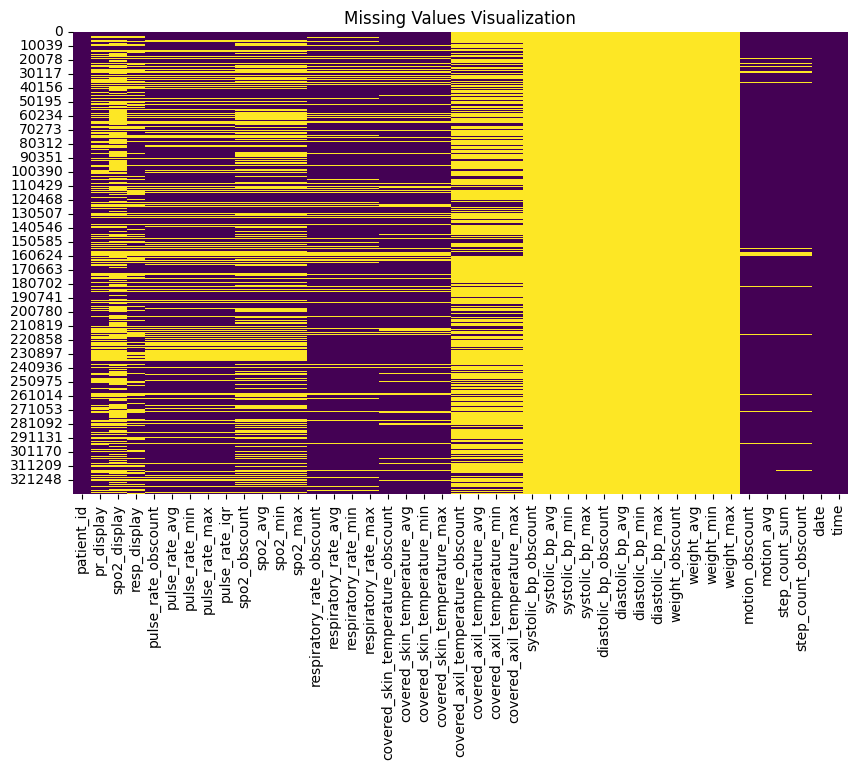

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(wearable_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()

In [104]:
wearable_data.isna().sum()

patient_id                                0
pr_display                           137063
spo2_display                         207480
resp_display                         117937
pulse_rate_obscount                   88109
pulse_rate_avg                        88109
pulse_rate_min                        88109
pulse_rate_max                        88109
pulse_rate_iqr                        88109
spo2_obscount                        148503
spo2_avg                             148503
spo2_min                             148503
spo2_max                             148503
respiratory_rate_obscount             57838
respiratory_rate_avg                  57838
respiratory_rate_min                  57838
respiratory_rate_max                  57838
covered_skin_temperature_obscount     59633
covered_skin_temperature_avg          59633
covered_skin_temperature_min          59633
covered_skin_temperature_max          59633
covered_axil_temperature_obscount    237859
covered_axil_temperature_avg    

In [105]:
wearable_data['patient_id'].nunique()

29

In [106]:
import pandas as pd

# Assuming your DataFrame is called `df` and has 'patient_id', 'date', and 'time' columns

# Combine 'date' and 'time' columns to create a datetime column
wearable_data['datetime'] = pd.to_datetime(wearable_data['date'] + ' ' + wearable_data['time'])

# Check if data is sorted within each patient by time
sorted_check = wearable_data.groupby('patient_id')['datetime'].apply(lambda x: x.is_monotonic_increasing)

# Print the results
if sorted_check.all():
    print("Data is sorted by time within each patient.")
else:
    print("Data is NOT sorted by time within each patient.")
    print("Patients with unsorted data:", sorted_check[~sorted_check].index.tolist())


Data is sorted by time within each patient.


In [107]:
import pandas as pd

# Assuming your data is loaded into a DataFrame called `df`
# Ensure your data is sorted by time or any relevant sequential feature

# Apply interpolation across all columns

df_interpolated = wearable_data.groupby('patient_id').apply(lambda group: group.interpolate(method='linear'))
df_interpolated.reset_index(drop=True, inplace=True)

# If you only want to interpolate specific columns, you can specify them like this:
# df_interpolated[['column1', 'column2']] = df.groupby('patient_id')[['column1', 'column2']].apply(lambda group: group.interpolate(method='linear'))

# Alternatively, you can use 'time' as the interpolation method if it is a time-indexed DataFrame
# df_interpolated = df.groupby('patient_id').apply(lambda group: group.interpolate(method='time'))

# Checking if any missing values remain
print(df_interpolated.isnull().sum())


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3032286556.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = wearable_data.groupby('patient_id').apply(lambda group: group.interpolate(method='linear'))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3032286556.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = wearable_data.groupby('patient_id').apply(lambda group: group.interpolate(method='linear'))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3032286556.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = wea

patient_id                                0
pr_display                           137063
spo2_display                         207480
resp_display                         117937
pulse_rate_obscount                     306
pulse_rate_avg                          306
pulse_rate_min                          306
pulse_rate_max                          306
pulse_rate_iqr                          306
spo2_obscount                           469
spo2_avg                                469
spo2_min                                469
spo2_max                                469
respiratory_rate_obscount                33
respiratory_rate_avg                     33
respiratory_rate_min                     33
respiratory_rate_max                     33
covered_skin_temperature_obscount        22
covered_skin_temperature_avg             22
covered_skin_temperature_min             22
covered_skin_temperature_max             22
covered_axil_temperature_obscount      6854
covered_axil_temperature_avg    

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3032286556.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = wearable_data.groupby('patient_id').apply(lambda group: group.interpolate(method='linear'))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3032286556.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = wearable_data.groupby('patient_id').apply(lambda group: group.interpolate(method='linear'))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3032286556.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = wea

In [108]:
columns_to_remove = ['systolic_bp_obscount', 'systolic_bp_avg', 'systolic_bp_min', 'systolic_bp_max', 'diastolic_bp_obscount', 'diastolic_bp_avg','diastolic_bp_min', 'diastolic_bp_max', 'weight_obscount', 'weight_avg', 'weight_min', 'weight_max']
df_missing_columns_removed = df_interpolated.drop(columns=columns_to_remove,axis=0)

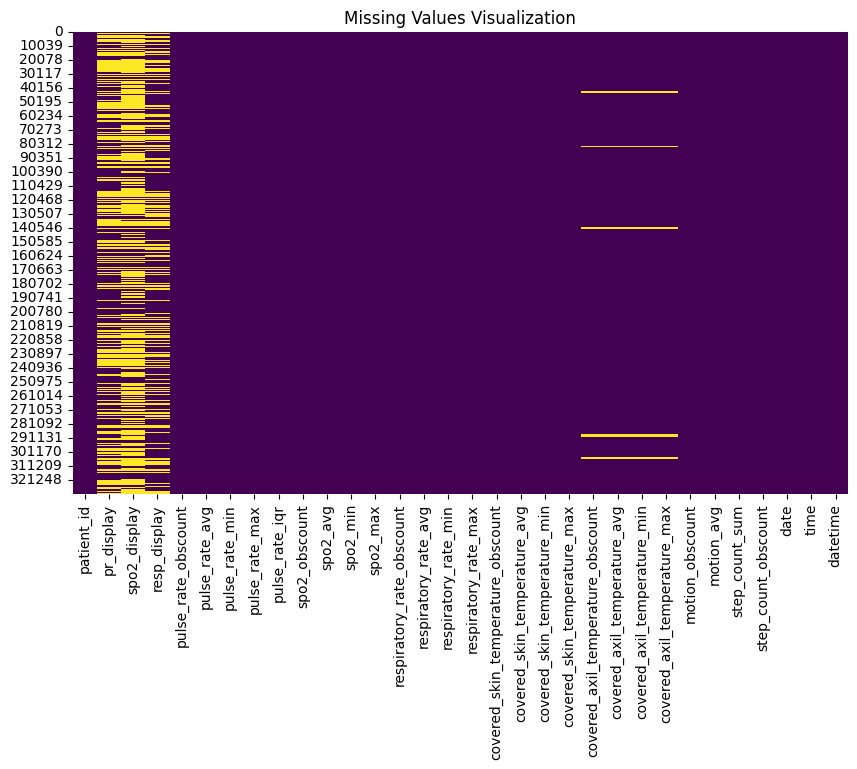

patient_id                                0
pr_display                           137063
spo2_display                         207480
resp_display                         117937
pulse_rate_obscount                     306
pulse_rate_avg                          306
pulse_rate_min                          306
pulse_rate_max                          306
pulse_rate_iqr                          306
spo2_obscount                           469
spo2_avg                                469
spo2_min                                469
spo2_max                                469
respiratory_rate_obscount                33
respiratory_rate_avg                     33
respiratory_rate_min                     33
respiratory_rate_max                     33
covered_skin_temperature_obscount        22
covered_skin_temperature_avg             22
covered_skin_temperature_min             22
covered_skin_temperature_max             22
covered_axil_temperature_obscount      6854
covered_axil_temperature_avg    

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_missing_columns_removed.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()
print(df_missing_columns_removed.isnull().sum())

In [110]:
## Forward & backward fill
# Forward fill and backward fill within each patient group
df_filled = df_missing_columns_removed.groupby('patient_id').apply(lambda group: group.ffill().bfill())

# Remove the additional index introduced by groupby
df_filled.reset_index(drop=True, inplace=True)

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1969166054.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df_missing_columns_removed.groupby('patient_id').apply(lambda group: group.ffill().bfill())


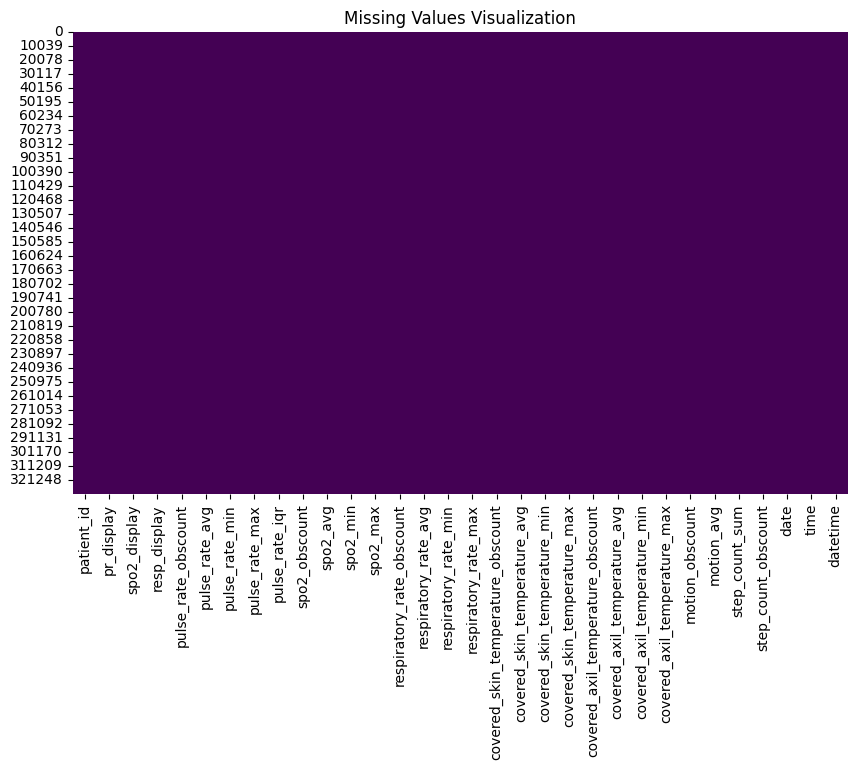

patient_id                             0
pr_display                             0
spo2_display                           0
resp_display                           0
pulse_rate_obscount                    0
pulse_rate_avg                         0
pulse_rate_min                         0
pulse_rate_max                         0
pulse_rate_iqr                         0
spo2_obscount                          0
spo2_avg                               0
spo2_min                               0
spo2_max                               0
respiratory_rate_obscount              0
respiratory_rate_avg                   0
respiratory_rate_min                   0
respiratory_rate_max                   0
covered_skin_temperature_obscount      0
covered_skin_temperature_avg           0
covered_skin_temperature_min           0
covered_skin_temperature_max           0
covered_axil_temperature_obscount    158
covered_axil_temperature_avg         158
covered_axil_temperature_min         158
covered_axil_tem

In [111]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_filled.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()
print(df_filled.isnull().sum())

In [112]:
# For the rest of missing values, it is because that patient 7026 has no values at all on these columns, so we just fill it with mean values
# Impute missing values in each column with the overall mean
df_filled['covered_axil_temperature_obscount'].fillna(df_filled['covered_axil_temperature_obscount'].mean(), inplace=True)
df_filled['covered_axil_temperature_avg'].fillna(df_filled['covered_axil_temperature_avg'].mean(), inplace=True)
df_filled['covered_axil_temperature_min'].fillna(df_filled['covered_axil_temperature_min'].mean(), inplace=True)
df_filled['covered_axil_temperature_max'].fillna(df_filled['covered_axil_temperature_max'].mean(), inplace=True)


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3434568317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['covered_axil_temperature_obscount'].fillna(df_filled['covered_axil_temperature_obscount'].mean(), inplace=True)
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3434568317.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never 

In [113]:
df_filled.head()

,patient_id,pr_display,spo2_display,resp_display,pulse_rate_obscount,pulse_rate_avg,pulse_rate_min,pulse_rate_max,pulse_rate_iqr,spo2_obscount,...,covered_axil_temperature_avg,covered_axil_temperature_min,covered_axil_temperature_max,motion_obscount,motion_avg,step_count_sum,step_count_obscount,date,time,datetime
0,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,33.15,33.15,33.15,14.0,1.00,0.0,2.0,10/21/2022,16:02:00,2022-10-21 16:02:00
1,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,33.15,33.15,33.15,2.0,1.00,0.0,1.5,10/21/2022,16:03:00,2022-10-21 16:03:00
2,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,33.15,33.15,33.15,4.0,1.00,0.0,1.0,10/21/2022,17:42:00,2022-10-21 17:42:00
3,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,33.15,33.15,33.15,12.0,1.00,0.0,1.0,10/21/2022,17:43:00,2022-10-21 17:43:00
4,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,33.15,33.15,33.15,7.0,4.86,0.0,2.0,10/21/2022,18:26:00,2022-10-21 18:26:00


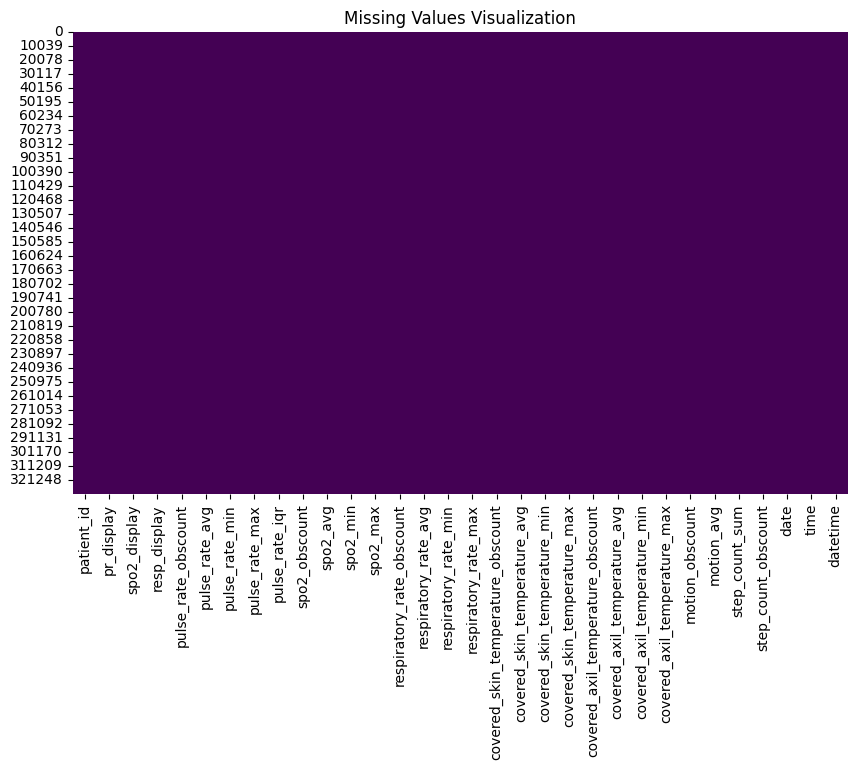

patient_id                           0
pr_display                           0
spo2_display                         0
resp_display                         0
pulse_rate_obscount                  0
pulse_rate_avg                       0
pulse_rate_min                       0
pulse_rate_max                       0
pulse_rate_iqr                       0
spo2_obscount                        0
spo2_avg                             0
spo2_min                             0
spo2_max                             0
respiratory_rate_obscount            0
respiratory_rate_avg                 0
respiratory_rate_min                 0
respiratory_rate_max                 0
covered_skin_temperature_obscount    0
covered_skin_temperature_avg         0
covered_skin_temperature_min         0
covered_skin_temperature_max         0
covered_axil_temperature_obscount    0
covered_axil_temperature_avg         0
covered_axil_temperature_min         0
covered_axil_temperature_max         0
motion_obscount          

In [114]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_filled.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()
print(df_filled.isnull().sum())

In [115]:
df_wearable = df_filled

In [116]:
data_wear_01_15 = pd.read_excel("../../Datasets/Annotated_WEAR_7001_7015_deID.xlsx", header = 7)
data_wear_16_30 = pd.read_excel("../../Datasets/Annotated_WEAR_7016_7030_deID.xlsx", header = 7)
# Get rid of normalization summarized rows

data_wear_01_15_remove_normalized = data_wear_01_15.dropna(subset = ['PT_ID'])
data_wear_16_30_remove_normalized = data_wear_16_30.dropna(subset = ['PT_ID'])


In [117]:
#renaming columns to match different data sets
data_wear_01_15_remove_normalized = data_wear_01_15_remove_normalized.rename(columns = {"abs Monocyte":"Abs Monocyte", "ABS Lymphocyte count":"Abs Lymphocyte", "Date of Last Response Assess if No PD (1_24_24)":"Date of last response assesment", "ICANS on date":"ICANs on date (0 -no, 1 yes)",
                                                                                        "Dose (10^6 cells)":"Total Cells infused (x10^6)"})



In [118]:
df_cytokine = pd.concat([data_wear_01_15_remove_normalized, data_wear_16_30_remove_normalized], axis=0, ignore_index=True)

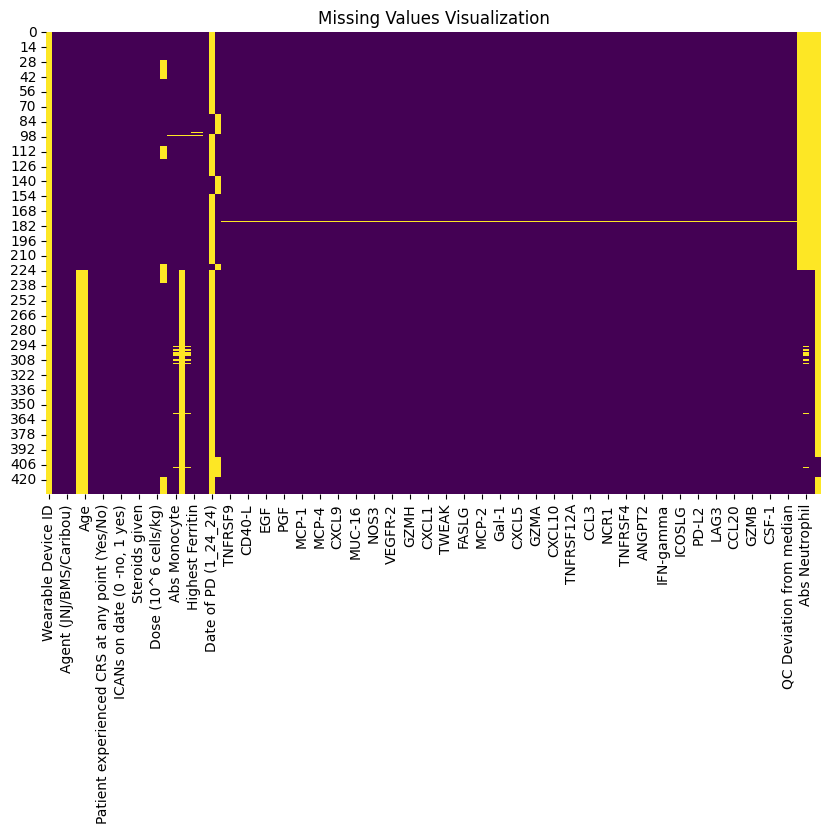

Wearable Device ID                                 434
Sample ID                                            0
PT_ID                                                0
Agent (JNJ/BMS/Caribou)                              0
Date of CAR-T infusion                               0
                                                  ... 
QC Deviation from median.1                           1
Patient experienced ICANS at any point (Yes/No)    224
Abs Neutrophil                                     235
Weight at time of infusion                         224
DOP                                                415
Length: 129, dtype: int64


In [119]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cytokine.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()
print(df_cytokine.isnull().sum())

In [120]:
df_cytokine['Date of Sample'] = pd.to_datetime(df_cytokine['Date of Sample'])
df_cytokine = df_cytokine.sort_values(by = ['PT_ID', 'Date of Sample'])
df_cytokine_interpolated = df_cytokine.groupby("PT_ID").apply(lambda x:x.interpolate(method="linear"))
df_cytokine_interpolated.reset_index(drop=True, inplace=True)
df_cytokine_interpolated = df_cytokine_interpolated.groupby("PT_ID").apply(lambda x:x.ffill().bfill())
df_cytokine_interpolated = df_cytokine_interpolated.drop(columns=['Wearable Device ID'])

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1908870015.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_cytokine_interpolated = df_cytokine.groupby("PT_ID").apply(lambda x:x.interpolate(method="linear"))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1908870015.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_cytokine_interpolated = df_cytokine.groupby("PT_ID").apply(lambda x:x.interpolate(method="linear"))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1908870015.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_cytokine_interpolated = df_cytok

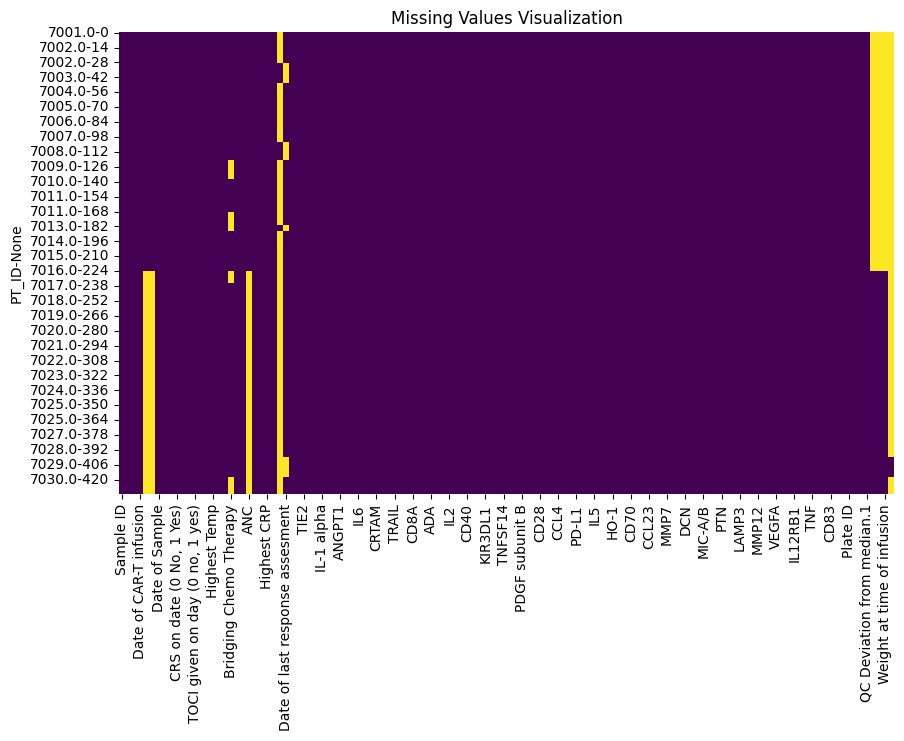

Sample ID                                            0
PT_ID                                                0
Agent (JNJ/BMS/Caribou)                              0
Date of CAR-T infusion                               0
DOB                                                210
                                                  ... 
QC Deviation from median.1                           0
Patient experienced ICANS at any point (Yes/No)    224
Abs Neutrophil                                     224
Weight at time of infusion                         224
DOP                                                415
Length: 128, dtype: int64


In [121]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cytokine_interpolated.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()
print(df_cytokine_interpolated.isnull().sum())

In [122]:
df_filled.columns

Index(['patient_id', 'pr_display', 'spo2_display', 'resp_display',
       'pulse_rate_obscount', 'pulse_rate_avg', 'pulse_rate_min',
       'pulse_rate_max', 'pulse_rate_iqr', 'spo2_obscount', 'spo2_avg',
       'spo2_min', 'spo2_max', 'respiratory_rate_obscount',
       'respiratory_rate_avg', 'respiratory_rate_min', 'respiratory_rate_max',
       'covered_skin_temperature_obscount', 'covered_skin_temperature_avg',
       'covered_skin_temperature_min', 'covered_skin_temperature_max',
       'covered_axil_temperature_obscount', 'covered_axil_temperature_avg',
       'covered_axil_temperature_min', 'covered_axil_temperature_max',
       'motion_obscount', 'motion_avg', 'step_count_sum',
       'step_count_obscount', 'date', 'time', 'datetime'],
      dtype='object')

In [123]:


# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Now print the results without truncation
print(df_cytokine_interpolated.isnull().sum())

# Optionally, reset display options after printing if you don't need to see all rows in future outputs
pd.reset_option('display.max_rows')


Sample ID                                            0
PT_ID                                                0
Agent (JNJ/BMS/Caribou)                              0
Date of CAR-T infusion                               0
DOB                                                210
Age                                                210
Date of Sample                                       0
Days in relation to CAR-T  infusion                  0
Patient experienced CRS at any point (Yes/No)        0
CRS on date (0 No, 1 Yes)                            0
CRS Grade                                            0
ICANs on date (0 -no, 1 yes)                         0
TOCI given on day (0 no, 1 yes)                      0
Anakinra given on day (0 no, 1 yes)                  0
Steroids given                                       0
Highest Temp                                         0
Total Cells infused (x10^6)                          0
Dose (10^6 cells/kg)                                 0
Bridging C

In [124]:
mode_value_therapy = df_cytokine_interpolated['Bridging Chemo Therapy'].mode()[0]  # Get the mode of the column
df_cytokine_interpolated["Bridging Chemo Therapy"].fillna(mode_value_therapy, inplace=True)
df_cytokine_interpolated['Age'].fillna(df_cytokine_interpolated['Age'].mean(),inplace=True)

# Convert the 'ANC' column to numeric, forcing any non-numeric values to NaN
df_cytokine_interpolated['ANC'] = pd.to_numeric(df_cytokine_interpolated['ANC'], errors='coerce')

df_cytokine_interpolated['ANC'].fillna(df_cytokine_interpolated['ANC'].mean(),inplace=True)
df_cytokine_interpolated['Weight at time of infusion'].fillna(df_cytokine_interpolated['Weight at time of infusion'].mean(),inplace=True)
mode_value_DoL = df_cytokine_interpolated['Date of last response assesment'].mode()[0]  # Get the mode of the column
df_cytokine_interpolated["Date of last response assesment"].fillna(mode_value_DoL, inplace=True)


column_to_remove = ['DOB','Date of PD (1_24_24)','Patient experienced ICANS at any point (Yes/No)', 'Abs Neutrophil','DOP']
df_cytokine_interpolated = df_cytokine_interpolated.drop(columns=column_to_remove)

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1441545826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cytokine_interpolated["Bridging Chemo Therapy"].fillna(mode_value_therapy, inplace=True)
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1441545826.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

In [125]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Now print the results without truncation
print(df_cytokine_interpolated.isnull().sum())

# Optionally, reset display options after printing if you don't need to see all rows in future outputs
pd.reset_option('display.max_rows')

Sample ID                                        0
PT_ID                                            0
Agent (JNJ/BMS/Caribou)                          0
Date of CAR-T infusion                           0
Age                                              0
Date of Sample                                   0
Days in relation to CAR-T  infusion              0
Patient experienced CRS at any point (Yes/No)    0
CRS on date (0 No, 1 Yes)                        0
CRS Grade                                        0
ICANs on date (0 -no, 1 yes)                     0
TOCI given on day (0 no, 1 yes)                  0
Anakinra given on day (0 no, 1 yes)              0
Steroids given                                   0
Highest Temp                                     0
Total Cells infused (x10^6)                      0
Dose (10^6 cells/kg)                             0
Bridging Chemo Therapy                           0
WBC                                              0
Abs Monocyte                   

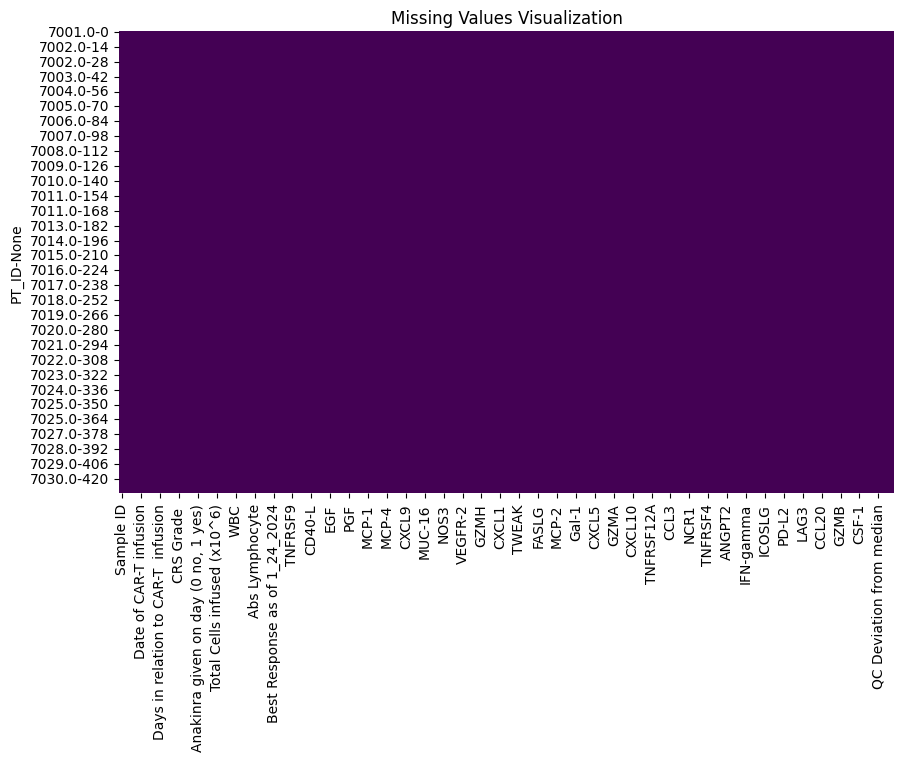

In [126]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cytokine_interpolated.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()

In [127]:
df_filled.to_csv("../..//Datasets/Filled_wearable_Data.csv")

#### Merge cytokine and wearable data

In [128]:
df_filled['PT_ID'] = df_filled['patient_id'].str.extract(r"(\d+)$")
df_filled['PT_ID']

0         7001
1         7001
2         7001
3         7001
4         7001
          ... 
331259    7029
331260    7029
331261    7029
331262    7029
331263    7029
Name: PT_ID, Length: 331264, dtype: object

In [129]:
df_filled['datetime']

0        2022-10-21 16:02:00
1        2022-10-21 16:03:00
2        2022-10-21 17:42:00
3        2022-10-21 17:43:00
4        2022-10-21 18:26:00
                 ...        
331259   2023-10-23 12:18:00
331260   2023-10-23 12:20:00
331261   2023-10-23 12:26:00
331262   2023-10-23 12:31:00
331263   2023-10-23 12:36:00
Name: datetime, Length: 331264, dtype: datetime64[ns]

In [130]:
df_cytokine_interpolated.reset_index(drop=True, inplace=True)

df_cytokine_interpolated['Date of Sample']

0     2022-10-21
1     2022-10-22
2     2022-10-22
3     2022-10-23
4     2022-10-24
         ...    
429   2023-11-27
430   2023-11-28
431   2023-11-29
432   2023-11-30
433   2023-12-01
Name: Date of Sample, Length: 434, dtype: datetime64[ns]

In [131]:
df_cytokine_cleaned = df_cytokine_interpolated
df_wearable_cleaned = df_filled

In [132]:
import pandas as pd
from datetime import timedelta


# Convert 'Date of Sample' to datetime format
df_cytokine_cleaned['Date of Sample'] = pd.to_datetime(df_cytokine_cleaned['Date of Sample'], format='%m/%d/%y')

# Sort the data by patient, date, and order of rows to make sure we're handling duplicates correctly
df_cytokine_cleaned = df_cytokine_cleaned.sort_values(['PT_ID', 'Date of Sample', 'Days in relation to CAR-T  infusion'])

# Create a dictionary to store each patient's baseline datetime
patient_baselines = {}

# Function to calculate precise datetime with a patient-specific baseline
def calculate_precise_datetime(group):
    # Determine the baseline date for the first occurrence for this patient
    patient_id = group.iloc[0]['PT_ID']
    
    if patient_id not in patient_baselines:
        # Set the baseline at 8:00 AM on the first date for this patient
        first_date = group.iloc[0]['Date of Sample']
        baseline_datetime = pd.Timestamp.combine(first_date, pd.to_datetime("08:00:00").time())
        patient_baselines[patient_id] = baseline_datetime
    else:
        baseline_datetime = patient_baselines[patient_id]
    
    # Calculate precise_datetime for each row based on Days in relation to CAR-T infusion
    for idx, row in group.iterrows():
        relation = str(row['Days in relation to CAR-T  infusion']).strip()
        if ('hr Post' in relation) or ('hr  Post' in relation) or ('hrs Post' in relation):
            # Extract hours from 'hr Post' format
            additional_hours = int(relation.split('hr')[0])
        elif relation.isdigit():
            # Treat numeric values as full days in terms of hours
            additional_hours = int(relation) * 24
        elif relation == 'Baseline':
            additional_hours = 0
        else:
            # Default to 0 hours if format is unknown
            additional_hours = 0
        
        # Calculate precise datetime by adding hours to the patient's baseline
        precise_datetime = baseline_datetime + timedelta(hours=additional_hours)
        df_cytokine_cleaned.at[idx, 'precise_datetime'] = precise_datetime

# Apply the function to each patient group
df_cytokine_cleaned['precise_datetime'] = pd.NaT  # Initialize the column
df_cytokine_cleaned.groupby(['PT_ID']).apply(calculate_precise_datetime)

# Check the result
print(df_cytokine_cleaned[['PT_ID', 'Date of Sample', 'Days in relation to CAR-T  infusion', 'precise_datetime']].head(20))




# Convert patient ID to string if needed

df_wearable_cleaned['PT_ID'] = df_wearable_cleaned['PT_ID'].astype(str)
df_cytokine_cleaned['PT_ID'] = df_cytokine_cleaned['PT_ID'].astype(float).astype(int).astype(str)

# Now you can remerge using the 'precise_datetime' column
# Assuming `df_wearable_cleaned` is already prepared with 'datetime' in datetime format
merged_data = pd.merge_asof(
    df_wearable_cleaned.sort_values('datetime'),
    df_cytokine_cleaned.sort_values('precise_datetime'),
    left_on='datetime',
    right_on='precise_datetime',
    by='PT_ID',
    direction='nearest'  # Use the most recent previous daily data for each minute
)

# Checking the result
print(merged_data.head())


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/443475878.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cytokine_cleaned['precise_datetime'] = pd.NaT  # Initialize the column
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/443475878.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cytokine_cleaned.groupby(['PT_ID']).apply(calculate_precise_datetime)


     PT_ID Date of Sample Days in relation to CAR-T  infusion  \
0   7001.0     2022-10-21                                   0   
1   7001.0     2022-10-22                                   1   
2   7001.0     2022-10-22                                   1   
3   7001.0     2022-10-23                                   2   
4   7001.0     2022-10-24                                   3   
5   7001.0     2022-10-25                                   4   
6   7001.0     2022-10-26                                   5   
7   7001.0     2022-10-27                                   6   
8   7001.0     2022-10-28                                   7   
9   7001.0     2022-10-29                                   8   
10  7001.0     2022-10-30                                   9   
11  7001.0     2022-10-31                                  10   
13  7002.0     2022-10-25                            2hr Post   
14  7002.0     2022-10-25                            4hr Post   
15  7002.0     2022-10-25

In [133]:
df_cytokine_cleaned[df_cytokine_cleaned.PT_ID == "7029"][['Date of Sample', 'Days in relation to CAR-T  infusion','precise_datetime',"CRS on date (0 No, 1 Yes)"]].sort_values(by=['precise_datetime'])

,Date of Sample,Days in relation to CAR-T infusion,precise_datetime,"CRS on date (0 No, 1 Yes)"
399,2023-10-11,0,2023-10-11 08:00:00,0.0
400,2023-10-11,2hr Post,2023-10-11 10:00:00,0.0
401,2023-10-11,4hr Post,2023-10-11 12:00:00,0.0
402,2023-10-11,6hr Post,2023-10-11 14:00:00,0.0
403,2023-10-11,8hr Post,2023-10-11 16:00:00,0.0
404,2023-10-12,23 hrs Post (CRS),2023-10-12 07:00:00,1.0
405,2023-10-12,1,2023-10-12 08:00:00,1.0
406,2023-10-13,2,2023-10-13 08:00:00,0.0
407,2023-10-14,3,2023-10-14 08:00:00,0.0
408,2023-10-15,4,2023-10-15 08:00:00,0.0


In [134]:
save_data = merged_data.copy()
save_data.datetime

0        2022-10-21 16:02:00
1        2022-10-21 16:03:00
2        2022-10-21 17:42:00
3        2022-10-21 17:43:00
4        2022-10-21 18:26:00
                 ...        
331259   2023-10-23 12:18:00
331260   2023-10-23 12:20:00
331261   2023-10-23 12:26:00
331262   2023-10-23 12:31:00
331263   2023-10-23 12:36:00
Name: datetime, Length: 331264, dtype: datetime64[ns]

In [135]:
merged_data = save_data.copy()

In [136]:
# Extract the date part for grouping by day
merged_data['date'] = merged_data['precise_datetime'].dt.date

# List of biomarker columns to interpolate
biomarker_columns = df_cytokine_cleaned.columns.difference(['PT_ID', 'datetime','ICANs on date (0 -no, 1 yes)', 'CRS on date (0 No, 1 Yes)'])

# Keep only the first row of each day for each patient
first_rows = merged_data.drop_duplicates(subset=['PT_ID', 'date'], keep='first')

# Set biomarker columns to NaN for rows that are not the first entry of each day
merged_data.loc[~merged_data.index.isin(first_rows.index), biomarker_columns] = np.nan

# Interpolate biomarkers data within each patient across the minute intervals
merged_data[biomarker_columns] = merged_data.groupby(['PT_ID'])[biomarker_columns].transform(lambda group: group.interpolate(method='linear'))

# Drop the temporary 'date' column if no longer needed
merged_data.drop(columns=['date'], inplace=True)

# Checking the result
print(merged_data.head())


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/995942541.py:14: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  merged_data[biomarker_columns] = merged_data.groupby(['PT_ID'])[biomarker_columns].transform(lambda group: group.interpolate(method='linear'))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/995942541.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  merged_data[biomarker_columns] = merged_data.groupby(['PT_ID'])[biomarker_columns].transform(lambda group: group.interpolate(method='linear'))
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/995942541.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(co

  patient_id    pr_display spo2_display resp_display  pulse_rate_obscount  \
0  WEAR_7001  71 beats/min          96%          17%                 10.0   
1  WEAR_7001  71 beats/min          96%          17%                 10.0   
2  WEAR_7001  71 beats/min          96%          17%                 10.0   
3  WEAR_7001  71 beats/min          96%          17%                 10.0   
4  WEAR_7001  71 beats/min          96%          17%                 10.0   

   pulse_rate_avg  pulse_rate_min  pulse_rate_max  pulse_rate_iqr  \
0           70.01           66.63           71.52            2.88   
1           70.01           66.63           71.52            2.88   
2           70.01           66.63           71.52            2.88   
3           70.01           66.63           71.52            2.88   
4           70.01           66.63           71.52            2.88   

   spo2_obscount  ...      GZMB      CD83      IL12     CSF-1  \
0            6.0  ...  0.267810  2.691600  5.689550  9.60

In [137]:
merged_data['ICANs on date (0 -no, 1 yes)']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
331259    0.0
331260    0.0
331261    0.0
331262    0.0
331263    0.0
Name: ICANs on date (0 -no, 1 yes), Length: 331264, dtype: float64

In [138]:
merged_data[merged_data.PT_ID == "7029"]["CRS on date (0 No, 1 Yes)"].unique()

array([0., 1.])

In [139]:
temp_d = merged_data[merged_data.PT_ID == "7029"]
temp_d[temp_d["CRS on date (0 No, 1 Yes)"]==1][["CRS on date (0 No, 1 Yes)","datetime"]]

,"CRS on date (0 No, 1 Yes)",datetime
319707,1.0,2023-10-11 23:31:00
319708,1.0,2023-10-11 23:32:00
319709,1.0,2023-10-11 23:33:00
319710,1.0,2023-10-11 23:34:00
319711,1.0,2023-10-11 23:35:00
...,...,...
320932,1.0,2023-10-12 19:56:00
320933,1.0,2023-10-12 19:57:00
320934,1.0,2023-10-12 19:58:00
320935,1.0,2023-10-12 19:59:00


In [140]:
merged_data.columns

Index(['patient_id', 'pr_display', 'spo2_display', 'resp_display',
       'pulse_rate_obscount', 'pulse_rate_avg', 'pulse_rate_min',
       'pulse_rate_max', 'pulse_rate_iqr', 'spo2_obscount',
       ...
       'GZMB', 'CD83', 'IL12', 'CSF-1', 'Plate ID', 'QC Warning',
       'QC Deviation from median', 'QC Deviation from median.1',
       'Weight at time of infusion', 'precise_datetime'],
      dtype='object', length=155)

In [141]:
merged_data.isna().sum()

patient_id                         0
pr_display                         0
spo2_display                       0
resp_display                       0
pulse_rate_obscount                0
                               ...  
QC Warning                    330950
QC Deviation from median           0
QC Deviation from median.1         0
Weight at time of infusion         0
precise_datetime                   0
Length: 155, dtype: int64

In [142]:
# Get time range for each patient in wearable data
wearable_time_range = df_wearable_cleaned.groupby('PT_ID')['datetime'].agg(['min', 'max']).reset_index()
wearable_time_range.columns = ['PT_ID', 'start_time_wearable', 'end_time_wearable']

# Get time range for each patient in cytokine data
df_cytokine_cleaned['PT_ID'] = df_cytokine_cleaned['PT_ID'].astype(int).astype(str)
cytokine_time_range = df_cytokine_cleaned.groupby('PT_ID')['precise_datetime'].agg(['min', 'max']).reset_index()
cytokine_time_range.columns = ['PT_ID', 'start_time_cytokine', 'end_time_cytokine']

# Merge to compare date ranges
time_ranges = pd.merge(wearable_time_range, cytokine_time_range, on='PT_ID', how='left')
print(time_ranges)


   PT_ID start_time_wearable   end_time_wearable start_time_cytokine  \
0   7001 2022-10-21 16:02:00 2022-11-02 16:48:00 2022-10-21 08:00:00   
1   7002 2022-10-25 22:06:00 2022-11-09 16:35:00 2022-10-25 08:00:00   
2   7003 2022-11-09 17:20:00 2022-11-23 09:30:00 2022-11-09 10:00:00   
3   7004 2022-12-05 15:44:00 2022-12-18 09:30:00 2022-12-05 08:00:00   
4   7005 2022-12-07 21:27:00 2022-12-20 15:57:00 2022-12-09 08:00:00   
5   7006 2022-12-14 16:42:00 2022-12-23 13:51:00 2022-12-14 08:00:00   
6   7007 2023-01-06 17:21:00 2023-01-19 18:54:00 2023-01-08 08:00:00   
7   7008 2023-01-23 15:31:00 2023-02-05 08:08:00 2023-01-23 08:00:00   
8   7009 2023-01-24 15:37:00 2023-02-07 16:30:00 2023-01-24 08:00:00   
9   7010 2023-01-30 22:08:00 2023-02-14 14:47:00 2023-01-31 08:00:00   
10  7011 2023-02-07 16:18:00 2023-02-23 04:57:00 2023-02-07 08:00:00   
11  7012 2023-02-09 18:09:00 2023-02-23 14:57:00 2023-02-09 08:00:00   
12  7013 2023-03-13 16:26:00 2023-03-26 03:19:00 2023-03-13 08:0

In [143]:
# Interpolate missing values
merged_data.interpolate(method='linear', inplace=True)

# Forward and backward fill for edge cases
merged_data.fillna(method='ffill', inplace=True)
merged_data.fillna(method='bfill', inplace=True)
merged_data.head()

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3932802417.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  merged_data.interpolate(method='linear', inplace=True)
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3932802417.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/3932802417.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='bfill', inplace=True)


,patient_id,pr_display,spo2_display,resp_display,pulse_rate_obscount,pulse_rate_avg,pulse_rate_min,pulse_rate_max,pulse_rate_iqr,spo2_obscount,...,GZMB,CD83,IL12,CSF-1,Plate ID,QC Warning,QC Deviation from median,QC Deviation from median.1,Weight at time of infusion,precise_datetime
0,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.267810,2.691600,5.689550,9.600130,ADRO04_IO_Plate01_11082023,Pass,0.039684,0.047985,74.325238,2022-10-21 08:00:00.000000000
1,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.295854,2.694068,5.693098,9.603254,ADRO04_IO_Plate01_11082023,Pass,0.040139,0.048813,74.325238,2022-10-21 08:14:32.727272704
2,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.323899,2.696536,5.696646,9.606379,ADRO04_IO_Plate01_11082023,Pass,0.040595,0.049641,74.325238,2022-10-21 08:29:05.454545408
3,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.351943,2.699005,5.700194,9.609503,ADRO04_IO_Plate01_11082023,Pass,0.041050,0.050469,74.325238,2022-10-21 08:43:38.181818112
4,WEAR_7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.379987,2.701473,5.703742,9.612627,ADRO04_IO_Plate01_11082023,Pass,0.041505,0.051297,74.325238,2022-10-21 08:58:10.909090816


In [144]:
list(merged_data.columns)

['patient_id',
 'pr_display',
 'spo2_display',
 'resp_display',
 'pulse_rate_obscount',
 'pulse_rate_avg',
 'pulse_rate_min',
 'pulse_rate_max',
 'pulse_rate_iqr',
 'spo2_obscount',
 'spo2_avg',
 'spo2_min',
 'spo2_max',
 'respiratory_rate_obscount',
 'respiratory_rate_avg',
 'respiratory_rate_min',
 'respiratory_rate_max',
 'covered_skin_temperature_obscount',
 'covered_skin_temperature_avg',
 'covered_skin_temperature_min',
 'covered_skin_temperature_max',
 'covered_axil_temperature_obscount',
 'covered_axil_temperature_avg',
 'covered_axil_temperature_min',
 'covered_axil_temperature_max',
 'motion_obscount',
 'motion_avg',
 'step_count_sum',
 'step_count_obscount',
 'time',
 'datetime',
 'PT_ID',
 'Sample ID',
 'Agent (JNJ/BMS/Caribou)',
 'Date of CAR-T infusion',
 'Age',
 'Date of Sample',
 'Days in relation to CAR-T  infusion',
 'Patient experienced CRS at any point (Yes/No)',
 'CRS on date (0 No, 1 Yes)',
 'CRS Grade ',
 'ICANs on date (0 -no, 1 yes)',
 'TOCI given on day (0 no,

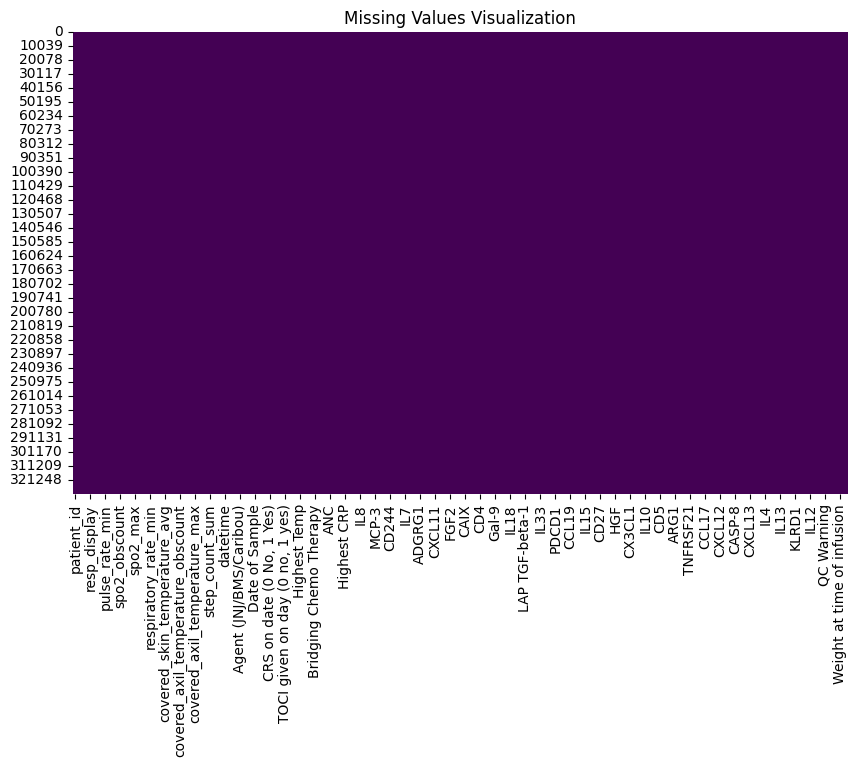

In [145]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Visualization")
plt.show()

In [146]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Now print the results without truncation
print(merged_data.isnull().sum())

# Optionally, reset display options after printing if you don't need to see all rows in future outputs
pd.reset_option('display.max_rows')

patient_id                                       0
pr_display                                       0
spo2_display                                     0
resp_display                                     0
pulse_rate_obscount                              0
pulse_rate_avg                                   0
pulse_rate_min                                   0
pulse_rate_max                                   0
pulse_rate_iqr                                   0
spo2_obscount                                    0
spo2_avg                                         0
spo2_min                                         0
spo2_max                                         0
respiratory_rate_obscount                        0
respiratory_rate_avg                             0
respiratory_rate_min                             0
respiratory_rate_max                             0
covered_skin_temperature_obscount                0
covered_skin_temperature_avg                     0
covered_skin_temperature_min   

In [147]:
ID_match = pd.read_csv("../..//Datasets/ID_match")
ID_match

,CH_ID\tOlink_ID
0,1e1acd61-e506-4d15-b442-b84b0236d2be\tWEAR_7001
1,9e9e94c7-01a6-4840-8240-eaa4c13a95ca\tWEAR_7002
2,f90f3710-cbf9-4a8e-92c2-e6144b89bcff\tWEAR_7003
3,46a8959e-a3ef-49c4-99b4-6abd2341bed8\tWEAR_7004
4,2e5a988f-4e78-4648-ba15-60c43e33f72e\tWEAR_7005
5,7af1b94f-d193-4220-9437-d84a329a7e88\tWEAR_7006
6,65038550-1e25-4fd5-934a-7574c55ea662\tWEAR_7007
7,4f191869-d131-44f1-b6db-3d7dbfc77abd\tWEAR_7008
8,398a8fc9-e1ef-4dfd-8b72-7a93b4fe777c\tWEAR_7009
9,38a0fa6b-acf9-4204-a4a4-ea06da443987\tWEAR_7010


In [148]:
ID_match[["CH_ID", "Olink_ID"]] = ID_match["CH_ID\tOlink_ID"].str.split("\t", expand = True)
ID_match['Olink_ID'] = ID_match["Olink_ID"].str.extract(r"(\d+)$")
ID_match = ID_match.drop(columns=["CH_ID\tOlink_ID"])
ID_match

,CH_ID,Olink_ID
0,1e1acd61-e506-4d15-b442-b84b0236d2be,7001
1,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,7002
2,f90f3710-cbf9-4a8e-92c2-e6144b89bcff,7003
3,46a8959e-a3ef-49c4-99b4-6abd2341bed8,7004
4,2e5a988f-4e78-4648-ba15-60c43e33f72e,7005
5,7af1b94f-d193-4220-9437-d84a329a7e88,7006
6,65038550-1e25-4fd5-934a-7574c55ea662,7007
7,4f191869-d131-44f1-b6db-3d7dbfc77abd,7008
8,398a8fc9-e1ef-4dfd-8b72-7a93b4fe777c,7009
9,38a0fa6b-acf9-4204-a4a4-ea06da443987,7010


In [149]:
Nurse_data = pd.read_csv("../../Datasets/Updated_Nurse_Data_with_UTC_Timestamp (1).csv")
Nurse_data.head(5)

,patient id,training_data,Enrolled,CAR-T infusion date Morning time,CAR-T infusion date,CAR-T product,First CRS timestamp (by RN),CRS marker at 1st timesamp,Subsequent CRS timestamps (by RN) and markrs,CRS Grade (max),CRS intervention,ICANS Grade,Standardized CAR-T product,Standardized First CRS timestamp (by RN) and subsequent,Temperature,SpO2,BP,HR,Standardized First CRS timestamp (by RN) and subsequent (UTC)
0,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,10/25/22,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,"IVF, Tocilizumab x 1 on (10/29/22)",0,Abecma,10/26/22 13:00,100F,WNL,WNL,WNL,2022-10-26 13:00:00+00:00
1,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,NaN,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,"IVF, Tocilizumab x 1 on (10/29/22)",0,Abecma,10/28/22 15:22,100.9F,WNL,WNL,WNL,2022-10-28 15:22:00+00:00
2,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,NaN,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,"IVF, Tocilizumab x 1 on (10/29/22)",0,Abecma,10/29/22 00:22,100.9F,WNL,WNL,WNL,2022-10-29 00:22:00+00:00
3,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,NaN,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,"IVF, Tocilizumab x 1 on (10/29/22)",0,Abecma,10/29/22 15:23,100.9F,WNL,WNL,WNL,2022-10-29 15:23:00+00:00
4,7af1b94f-d193-4220-9437-d84a329a7e88,1,12/14/22,2022-12-14 07:06:00,12/14/22,Abecma,NaN,NaN,NaN,0,"IVF, Tocilizumab x 1 on (10/29/22)",0,Abecma,NaN,WNL,WNL,WNL,WNL,NaN


In [150]:
Nurse_data = pd.merge(Nurse_data, ID_match, left_on="patient id", right_on="CH_ID",how="left")
Nurse_data.head(5)

,patient id,training_data,Enrolled,CAR-T infusion date Morning time,CAR-T infusion date,CAR-T product,First CRS timestamp (by RN),CRS marker at 1st timesamp,Subsequent CRS timestamps (by RN) and markrs,CRS Grade (max),...,ICANS Grade,Standardized CAR-T product,Standardized First CRS timestamp (by RN) and subsequent,Temperature,SpO2,BP,HR,Standardized First CRS timestamp (by RN) and subsequent (UTC),CH_ID,Olink_ID
0,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,10/25/22,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,...,0,Abecma,10/26/22 13:00,100F,WNL,WNL,WNL,2022-10-26 13:00:00+00:00,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,7002
1,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,NaN,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,...,0,Abecma,10/28/22 15:22,100.9F,WNL,WNL,WNL,2022-10-28 15:22:00+00:00,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,7002
2,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,NaN,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,...,0,Abecma,10/29/22 00:22,100.9F,WNL,WNL,WNL,2022-10-29 00:22:00+00:00,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,7002
3,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,1,10/25/22,2022-10-25 08:58:00,NaN,Abecma,10/26/22 at 13:00,"Temp 100F, SpO2 WNL, BP WNL","10/28/22 at 15:22 (100.9F), 10/29/22 at 00:22 ...",1,...,0,Abecma,10/29/22 15:23,100.9F,WNL,WNL,WNL,2022-10-29 15:23:00+00:00,9e9e94c7-01a6-4840-8240-eaa4c13a95ca,7002
4,7af1b94f-d193-4220-9437-d84a329a7e88,1,12/14/22,2022-12-14 07:06:00,12/14/22,Abecma,NaN,NaN,NaN,0,...,0,Abecma,NaN,WNL,WNL,WNL,WNL,NaN,7af1b94f-d193-4220-9437-d84a329a7e88,7006


In [151]:
selected_list = ['Olink_ID', 'CRS intervention ','Standardized First CRS timestamp (by RN) and subsequent (UTC)','CRS Grade (max)','Temperature','SpO2', 'BP', 'HR']
Nurse_data_selected = Nurse_data[selected_list]
Nurse_data_selected

,Olink_ID,CRS intervention,Standardized First CRS timestamp (by RN) and subsequent (UTC),CRS Grade (max),Temperature,SpO2,BP,HR
0,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-26 13:00:00+00:00,1,100F,WNL,WNL,WNL
1,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-28 15:22:00+00:00,1,100.9F,WNL,WNL,WNL
2,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-29 00:22:00+00:00,1,100.9F,WNL,WNL,WNL
3,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-29 15:23:00+00:00,1,100.9F,WNL,WNL,WNL
4,7006,"IVF, Tocilizumab x 1 on (10/29/22)",NaN,0,WNL,WNL,WNL,WNL
...,...,...,...,...,...,...,...,...
110,NaN,Tocilizumab x 1 on 11/4/21,2021-11-03 08:07:00+00:00,1,101.7F,WNL,WNL,WNL
111,NaN,Tocilizumab x 1 on 10/20/21,2021-10-19 23:48:00+00:00,1,101.8F,WNL,WNL,WNL
112,NaN,"Tocilizumab x 1 on 7/20/21, Anakinra 200mg q8h...",2021-07-18 18:00:00+00:00,1,100.6F,WNL,WNL,WNL
113,NaN,"Tocilizumab x 1 on 9/29/21, Anakinra (10/2-10/...",2021-09-29 17:28:00+00:00,1,101F,WNL,WNL,WNL


In [152]:
Nurse_data_selected_cleaned = Nurse_data_selected.dropna(subset=['Olink_ID'])
Nurse_data_selected_cleaned.sort_values(by=['Olink_ID']).head()

,Olink_ID,CRS intervention,Standardized First CRS timestamp (by RN) and subsequent (UTC),CRS Grade (max),Temperature,SpO2,BP,HR
16,7001,Tocilizumab x 1 on 1/22/24,2022-10-22 04:45:00+00:00,1,WNL,WNL,WNL,WNL
15,7001,Tocilizumab x 1 on 1/22/24,2022-01-21 23:30:00+00:00,1,100.9F,WNL,WNL,WNL
0,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-26 13:00:00+00:00,1,100F,WNL,WNL,WNL
1,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-28 15:22:00+00:00,1,100.9F,WNL,WNL,WNL
2,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-29 00:22:00+00:00,1,100.9F,WNL,WNL,WNL


In [153]:
Nurse_data_selected_cleaned = Nurse_data_selected_cleaned.rename(columns={"Olink_ID":"patient_id","Standardized First CRS timestamp (by RN) and subsequent (UTC)":"datetime"})
Nurse_data_selected_cleaned['datetime'] = pd.to_datetime(Nurse_data_selected_cleaned['datetime']).dt.tz_localize(None)

In [154]:
Nurse_data_selected_cleaned

,patient_id,CRS intervention,datetime,CRS Grade (max),Temperature,SpO2,BP,HR
0,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-26 13:00:00,1,100F,WNL,WNL,WNL
1,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-28 15:22:00,1,100.9F,WNL,WNL,WNL
2,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-29 00:22:00,1,100.9F,WNL,WNL,WNL
3,7002,"IVF, Tocilizumab x 1 on (10/29/22)",2022-10-29 15:23:00,1,100.9F,WNL,WNL,WNL
4,7006,"IVF, Tocilizumab x 1 on (10/29/22)",NaT,0,WNL,WNL,WNL,WNL
...,...,...,...,...,...,...,...,...
104,7028,Toci on 10/4/23,2023-10-04 11:37:00,1,100.4F,WNL,WNL,80
105,7028,Toci on 10/4/23,2024-10-05 12:26:00,1,100.9,WNL,WNL,81
106,7028,Toci on 10/4/23,2023-10-05 23:39:00,1,100.4,WNL,WNL,89
107,7029,Toci on 10/12/23,2023-10-12 17:02:00,1,101.7F,WNL,WNL,90


In [155]:
merged_data['patient_id'] = merged_data['patient_id'].str.replace("WEAR_", "")
final_data = pd.merge(
    merged_data,
    Nurse_data_selected_cleaned,
    on=['patient_id', 'datetime'],
    how='left'  # Use 'left' to keep all rows in merged_data, or 'inner' for only matching rows
)

# Check the result
print(final_data.head())

  patient_id    pr_display spo2_display resp_display  pulse_rate_obscount  \
0       7001  71 beats/min          96%          17%                 10.0   
1       7001  71 beats/min          96%          17%                 10.0   
2       7001  71 beats/min          96%          17%                 10.0   
3       7001  71 beats/min          96%          17%                 10.0   
4       7001  71 beats/min          96%          17%                 10.0   

   pulse_rate_avg  pulse_rate_min  pulse_rate_max  pulse_rate_iqr  \
0           70.01           66.63           71.52            2.88   
1           70.01           66.63           71.52            2.88   
2           70.01           66.63           71.52            2.88   
3           70.01           66.63           71.52            2.88   
4           70.01           66.63           71.52            2.88   

   spo2_obscount  ...  QC Deviation from median  QC Deviation from median.1  \
0            6.0  ...                  0.03

In [156]:
import pandas as pd

# Ensure the 'patient_id' and 'datetime' columns are compatible between datasets
merged_data['patient_id'] = merged_data['patient_id'].astype(str)
Nurse_data_selected_cleaned['patient_id'] = Nurse_data_selected_cleaned['patient_id'].astype(str)

# Convert datetime columns to datetime type
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])
Nurse_data_selected_cleaned['datetime'] = pd.to_datetime(Nurse_data_selected_cleaned['datetime'])

# Perform an exact merge to retain only matching rows
exact_merge = pd.merge(
    Nurse_data_selected_cleaned,
    merged_data,
    on=['patient_id', 'datetime'],
    how='inner'
)

# Identify unmatched rows in Nurse_data_selected_cleaned
unmatched_rows = Nurse_data_selected_cleaned[~Nurse_data_selected_cleaned.set_index(['patient_id', 'datetime']).index.isin(exact_merge.set_index(['patient_id', 'datetime']).index)]

# Concatenate unmatched rows back with the exact merge
combined_data = pd.concat([exact_merge, unmatched_rows], ignore_index=True).sort_values(['patient_id', 'datetime']).reset_index(drop=True)

# # Fill missing values using the nearest available data by timestamp within each patient
# # We fill each group separately to avoid index mismatch issues
# for patient_id, group in combined_data.groupby('patient_id'):
#     combined_data.loc[group.index, merged_data.columns.difference(['patient_id', 'datetime'])] = (
#         group[merged_data.columns.difference(['patient_id', 'datetime'])].fillna(method='ffill').fillna(method='bfill')
#     )

# Check the result
final_data = pd.concat([final_data, combined_data], ignore_index=True).sort_values(['patient_id', 'datetime']).reset_index(drop=True)

# Drop any duplicate rows if needed
final_data = final_data.drop_duplicates(subset=['patient_id', 'datetime'], keep='first')

# Check the result
print(final_data.head())



  patient_id    pr_display spo2_display resp_display  pulse_rate_obscount  \
0       7001           NaN          NaN          NaN                  NaN   
1       7001  71 beats/min          96%          17%                 10.0   
2       7001  71 beats/min          96%          17%                 10.0   
3       7001  71 beats/min          96%          17%                 10.0   
4       7001  71 beats/min          96%          17%                 10.0   

   pulse_rate_avg  pulse_rate_min  pulse_rate_max  pulse_rate_iqr  \
0             NaN             NaN             NaN             NaN   
1           70.01           66.63           71.52            2.88   
2           70.01           66.63           71.52            2.88   
3           70.01           66.63           71.52            2.88   
4           70.01           66.63           71.52            2.88   

   spo2_obscount  ...  QC Deviation from median  QC Deviation from median.1  \
0            NaN  ...                      

In [157]:


# Identify the columns to apply filling operations to
fill_columns = [col for col in final_data.columns if col not in selected_list]

# Apply linear interpolation, forward fill, and backward fill
final_data[fill_columns] = final_data[fill_columns].interpolate(method='linear', limit_direction='both')
final_data[fill_columns] = final_data[fill_columns].fillna(method='ffill').fillna(method='bfill')

# Check the result
print(final_data.head())


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/4217699556.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  final_data[fill_columns] = final_data[fill_columns].interpolate(method='linear', limit_direction='both')
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/4217699556.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data[fill_columns] = final_data[fill_columns].fillna(method='ffill').fillna(method='bfill')


  patient_id    pr_display spo2_display resp_display  pulse_rate_obscount  \
0       7001  71 beats/min          96%          17%                 10.0   
1       7001  71 beats/min          96%          17%                 10.0   
2       7001  71 beats/min          96%          17%                 10.0   
3       7001  71 beats/min          96%          17%                 10.0   
4       7001  71 beats/min          96%          17%                 10.0   

   pulse_rate_avg  pulse_rate_min  pulse_rate_max  pulse_rate_iqr  \
0           70.01           66.63           71.52            2.88   
1           70.01           66.63           71.52            2.88   
2           70.01           66.63           71.52            2.88   
3           70.01           66.63           71.52            2.88   
4           70.01           66.63           71.52            2.88   

   spo2_obscount  ...  QC Deviation from median  QC Deviation from median.1  \
0            6.0  ...                  0.03

In [158]:
final_data.isna().sum()

patient_id                  0
pr_display                  0
spo2_display                0
resp_display                0
pulse_rate_obscount         0
                        ...  
CRS Grade (max)        331198
Temperature            331198
SpO2                   331198
BP                     331198
HR                     331198
Length: 161, dtype: int64

In [159]:
import pandas as pd
import numpy as np

# Assume the column is named 'Temperature'
# Remove non-numeric values (like 'WNL') and the "F" suffix, and convert to float
final_data['Temperature'] = pd.to_numeric(final_data['Temperature'].str.replace('F', ''), errors='coerce')



# Convert Fahrenheit to Celsius
final_data['Temperature_C'] = (final_data['Temperature'] - 32) * 5/9



/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1391894.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_data['Temperature_C'] = (final_data['Temperature'] - 32) * 5/9


In [160]:
temperature_cols = [col for col in final_data.columns if "temperature" in col.lower()]
temperature_cols

['covered_skin_temperature_obscount',
 'covered_skin_temperature_avg',
 'covered_skin_temperature_min',
 'covered_skin_temperature_max',
 'covered_axil_temperature_obscount',
 'covered_axil_temperature_avg',
 'covered_axil_temperature_min',
 'covered_axil_temperature_max',
 'Temperature',
 'Temperature_C']

In [161]:
[col for col in final_data.columns if "crs" in col.lower()]

['Patient experienced CRS at any point (Yes/No)',
 'CRS on date (0 No, 1 Yes)',
 'CRS Grade ',
 'CRS intervention ',
 'CRS Grade (max)']

In [162]:
final_data[~final_data['Temperature'].isna()][temperature_cols]

,covered_skin_temperature_obscount,covered_skin_temperature_avg,covered_skin_temperature_min,covered_skin_temperature_max,covered_axil_temperature_obscount,covered_axil_temperature_avg,covered_axil_temperature_min,covered_axil_temperature_max,Temperature,Temperature_C
0,2.00,27.650,27.6200,27.690,1.0,33.150000,33.150000,33.150000,100.9,38.277778
10547,1.75,35.545,35.5375,35.545,1.0,36.030000,36.030000,36.030000,100.0,37.777778
13435,2.00,30.380,30.3700,30.380,1.0,23.780000,23.780000,23.780000,100.9,38.277778
13976,2.00,35.390,35.3800,35.390,1.0,35.720000,35.720000,35.720000,100.9,38.277778
14878,2.00,31.730,31.7100,31.750,1.0,35.965269,35.965269,35.965269,100.9,38.277778
...,...,...,...,...,...,...,...,...,...,...
311778,2.00,34.850,34.8300,34.870,1.0,37.008333,37.008333,37.008333,100.4,38.000000
313884,2.00,33.160,33.1500,33.170,1.0,32.400000,32.400000,32.400000,100.4,38.000000
319335,1.50,29.420,29.4150,29.425,1.0,33.310000,33.310000,33.310000,100.9,38.277778
320865,2.00,34.900,34.9000,34.910,1.0,37.520000,37.520000,37.520000,101.7,38.722222


In [163]:
final_data = final_data.rename(columns={"CRS Grade (max)":"CRS Grade (nurse)"})

In [164]:
import pandas as pd

# Ensure CRS Grade is numeric to allow comparison
final_data['CRS Grade (nurse)'] = pd.to_numeric(final_data['CRS Grade (nurse)'], errors='coerce')

# Define a function to apply the transformation for each patient group
def update_crs_status(group):
    # Find the first row where CRS Grade > 0 and is not null
    first_crs_index = group.loc[(group['CRS Grade (nurse)'] > 0) & group['CRS Grade (nurse)'].notna()].index.min()
    
    # If such a row exists, set "Patient experienced CRS at any point (Yes/No)" to "No" for rows before it
    if not pd.isna(first_crs_index):
        group.loc[group.index < first_crs_index, "CRS on date (0 No, 1 Yes)"] = 0
    
    # Return the updated group
    return group

# Apply the function to each patient group
final_data = final_data.groupby('patient_id', group_keys=False).apply(update_crs_status)

# Check the result
print(final_data[['patient_id', 'datetime', 'CRS Grade (nurse)', 'CRS on date (0 No, 1 Yes)']].head())


  patient_id            datetime  CRS Grade (nurse)  CRS on date (0 No, 1 Yes)
0       7001 2022-01-21 23:30:00                1.0                        1.0
1       7001 2022-10-21 16:02:00                NaN                        1.0
2       7001 2022-10-21 16:03:00                NaN                        1.0
3       7001 2022-10-21 17:42:00                NaN                        1.0
4       7001 2022-10-21 17:43:00                NaN                        1.0


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1034580212.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_data = final_data.groupby('patient_id', group_keys=False).apply(update_crs_status)


In [165]:
final_data.isna().sum()

patient_id                  0
pr_display                  0
spo2_display                0
resp_display                0
pulse_rate_obscount         0
                        ...  
Temperature            331205
SpO2                   331198
BP                     331198
HR                     331198
Temperature_C          331205
Length: 162, dtype: int64

In [166]:
# List of columns to exclude from forward fill
exclude_columns = [
    'CRS intervention', 
    'CRS Grade (nurse)', 
    'Temperature', 
    'SpO2', 
    'BP', 
    'HR', 
    'Temperature_C'
]

# Create a list of columns to apply forward fill
fill_columns = [col for col in final_data.columns if col not in exclude_columns]

# Apply forward fill only on the selected columns
final_data[fill_columns] = final_data[fill_columns].fillna(method='ffill')

# Check the result
print(final_data.head())


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/4145922303.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data[fill_columns] = final_data[fill_columns].fillna(method='ffill')


  patient_id    pr_display spo2_display resp_display  pulse_rate_obscount  \
0       7001  71 beats/min          96%          17%                 10.0   
1       7001  71 beats/min          96%          17%                 10.0   
2       7001  71 beats/min          96%          17%                 10.0   
3       7001  71 beats/min          96%          17%                 10.0   
4       7001  71 beats/min          96%          17%                 10.0   

   pulse_rate_avg  pulse_rate_min  pulse_rate_max  pulse_rate_iqr  \
0           70.01           66.63           71.52            2.88   
1           70.01           66.63           71.52            2.88   
2           70.01           66.63           71.52            2.88   
3           70.01           66.63           71.52            2.88   
4           70.01           66.63           71.52            2.88   

   spo2_obscount  ...  QC Deviation from median.1  Weight at time of infusion  \
0            6.0  ...                    

In [167]:
final_data.isna().sum()

patient_id                  0
pr_display                  0
spo2_display                0
resp_display                0
pulse_rate_obscount         0
                        ...  
Temperature            331205
SpO2                   331198
BP                     331198
HR                     331198
Temperature_C          331205
Length: 162, dtype: int64

In [168]:
## Handle 7001
# First, filter the DataFrame to get the index of the first row for patient_id == "7001"
index_to_modify = final_data.loc[final_data['patient_id'] == "7001"].index[0]

# Then, set the value using .at
final_data.at[index_to_modify, 'CRS on date (0 No, 1 Yes)'] = 0
final_data[(final_data['patient_id'] == "7001") & (final_data['datetime'] > pd.Timestamp("2022-10-23"))]['CRS on date (0 No, 1 Yes)']


1505    0.0
1506    0.0
1507    0.0
1508    0.0
1509    0.0
       ... 
9648    0.0
9649    0.0
9650    0.0
9651    0.0
9652    0.0
Name: CRS on date (0 No, 1 Yes), Length: 8148, dtype: float64

In [169]:
final_data[(final_data['patient_id'] == "7029") ]['CRS on date (0 No, 1 Yes)'].unique()

array([0., 1.])

In [170]:
# Filter the DataFrame for the specific patient
patient_data = final_data[final_data['patient_id'] == "7026"].sort_values(by=['datetime'])

# Get the indices of the last three rows for this patient
last_three_indices = patient_data.tail(3).index

# Set the 'CRS on date (0 No, 1 Yes)' column to 1 for these indices
final_data.loc[last_three_indices, 'CRS on date (0 No, 1 Yes)'] = 1

# Verify the changes
print(final_data[final_data['patient_id'] == "7026"][["CRS on date (0 No, 1 Yes)", "datetime"]])


        CRS on date (0 No, 1 Yes)            datetime
288741                        0.0 2023-09-08 15:43:00
288742                        0.0 2023-09-08 15:44:00
288743                        0.0 2023-09-08 15:45:00
288744                        0.0 2023-09-08 18:55:00
288745                        0.0 2023-09-08 18:56:00
...                           ...                 ...
288897                        0.0 2023-09-08 21:28:00
288898                        0.0 2023-09-08 21:29:00
288899                        1.0 2023-09-14 17:04:00
288900                        1.0 2023-09-15 11:50:00
288901                        1.0 2023-09-15 18:35:00

[161 rows x 2 columns]


In [171]:
final_data.to_csv("../../Datasets/final_data.csv")

In [172]:
final_data[['patient_id','datetime','Date of CAR-T infusion']].sort_values(by = ['patient_id','datetime']).head()

,patient_id,datetime,Date of CAR-T infusion
0,7001,2022-01-21 23:30:00,10/21/22
1,7001,2022-10-21 16:02:00,10/21/22
2,7001,2022-10-21 16:03:00,10/21/22
3,7001,2022-10-21 17:42:00,10/21/22
4,7001,2022-10-21 17:43:00,10/21/22


In [173]:
# Group by patient_id and get the first (earliest) row for each patient
final_data['datetime'] = pd.to_datetime(final_data['datetime'])
earliest_dates = final_data.sort_values('datetime').groupby('patient_id').first().reset_index()

# Select only patient_id, datetime, and Date of CAR-T infusion columns
earliest_dates = earliest_dates[['patient_id', 'datetime', 'Date of CAR-T infusion']]

# Convert 'datetime' column to the desired format
earliest_dates['datetime'] = earliest_dates['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Convert 'Date of CAR-T infusion' to a datetime format and then format it the same way
earliest_dates['Date of CAR-T infusion'] = pd.to_datetime(earliest_dates['Date of CAR-T infusion'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

# Display the result
print(earliest_dates)




   patient_id             datetime Date of CAR-T infusion
0        7001  2022-01-21 23:30:00    2022-10-21 00:00:00
1        7002  2022-10-25 22:06:00    2022-10-25 00:00:00
2        7003  2022-11-09 17:20:00    2022-11-09 00:00:00
3        7004  2022-12-05 15:44:00    2022-12-05 00:00:00
4        7005  2022-12-07 21:27:00    2022-12-07 00:00:00
5        7006  2022-12-14 16:42:00    2022-12-14 00:00:00
6        7007  2023-01-06 17:21:00    2023-01-06 00:00:00
7        7008  2023-01-23 15:31:00    2023-01-23 00:00:00
8        7009  2023-01-24 15:37:00    2023-01-24 00:00:00
9        7010  2023-01-30 22:08:00    2023-01-31 00:00:00
10       7011  2023-02-07 16:18:00    2023-02-07 00:00:00
11       7012  2022-03-16 16:44:00    2023-02-07 00:00:00
12       7013  2023-03-13 16:26:00    2023-03-13 00:00:00
13       7014  2023-04-04 15:02:00    2023-04-04 00:00:00
14       7015  2023-04-18 15:29:00    2023-04-18 00:00:00
15       7016  2023-04-27 13:33:00    2023-04-27 00:00:00
16       7017 

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/1674164349.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earliest_dates['Date of CAR-T infusion'] = pd.to_datetime(earliest_dates['Date of CAR-T infusion'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')


In [174]:
final_data.head()

,patient_id,pr_display,spo2_display,resp_display,pulse_rate_obscount,pulse_rate_avg,pulse_rate_min,pulse_rate_max,pulse_rate_iqr,spo2_obscount,...,QC Deviation from median.1,Weight at time of infusion,precise_datetime,CRS intervention,CRS Grade (nurse),Temperature,SpO2,BP,HR,Temperature_C
0,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.047985,74.325238,2022-10-21 08:00:00.000000000,Tocilizumab x 1 on 1/22/24,1.0,100.9,WNL,WNL,WNL,38.277778
1,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.047985,74.325238,2022-10-21 08:00:00.000000000,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
2,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.048813,74.325238,2022-10-21 08:14:32.727272704,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
3,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.049641,74.325238,2022-10-21 08:29:05.454545408,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
4,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,6.0,...,0.050469,74.325238,2022-10-21 08:43:38.181818112,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
final_data['CRS on date (0 No, 1 Yes)'].unique()
# Update the column to convert all values > 0 to 1
final_data['CRS on date (0 No, 1 Yes)'] = (final_data['CRS on date (0 No, 1 Yes)'] > 0).astype(int)
final_data['CRS on date (0 No, 1 Yes)'].unique()


array([0, 1])

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/116435297.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crs_dates = final_data.groupby('patient_id').apply(find_crs_dates).reset_index()
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/116435297.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper right')
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/116435297.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored w

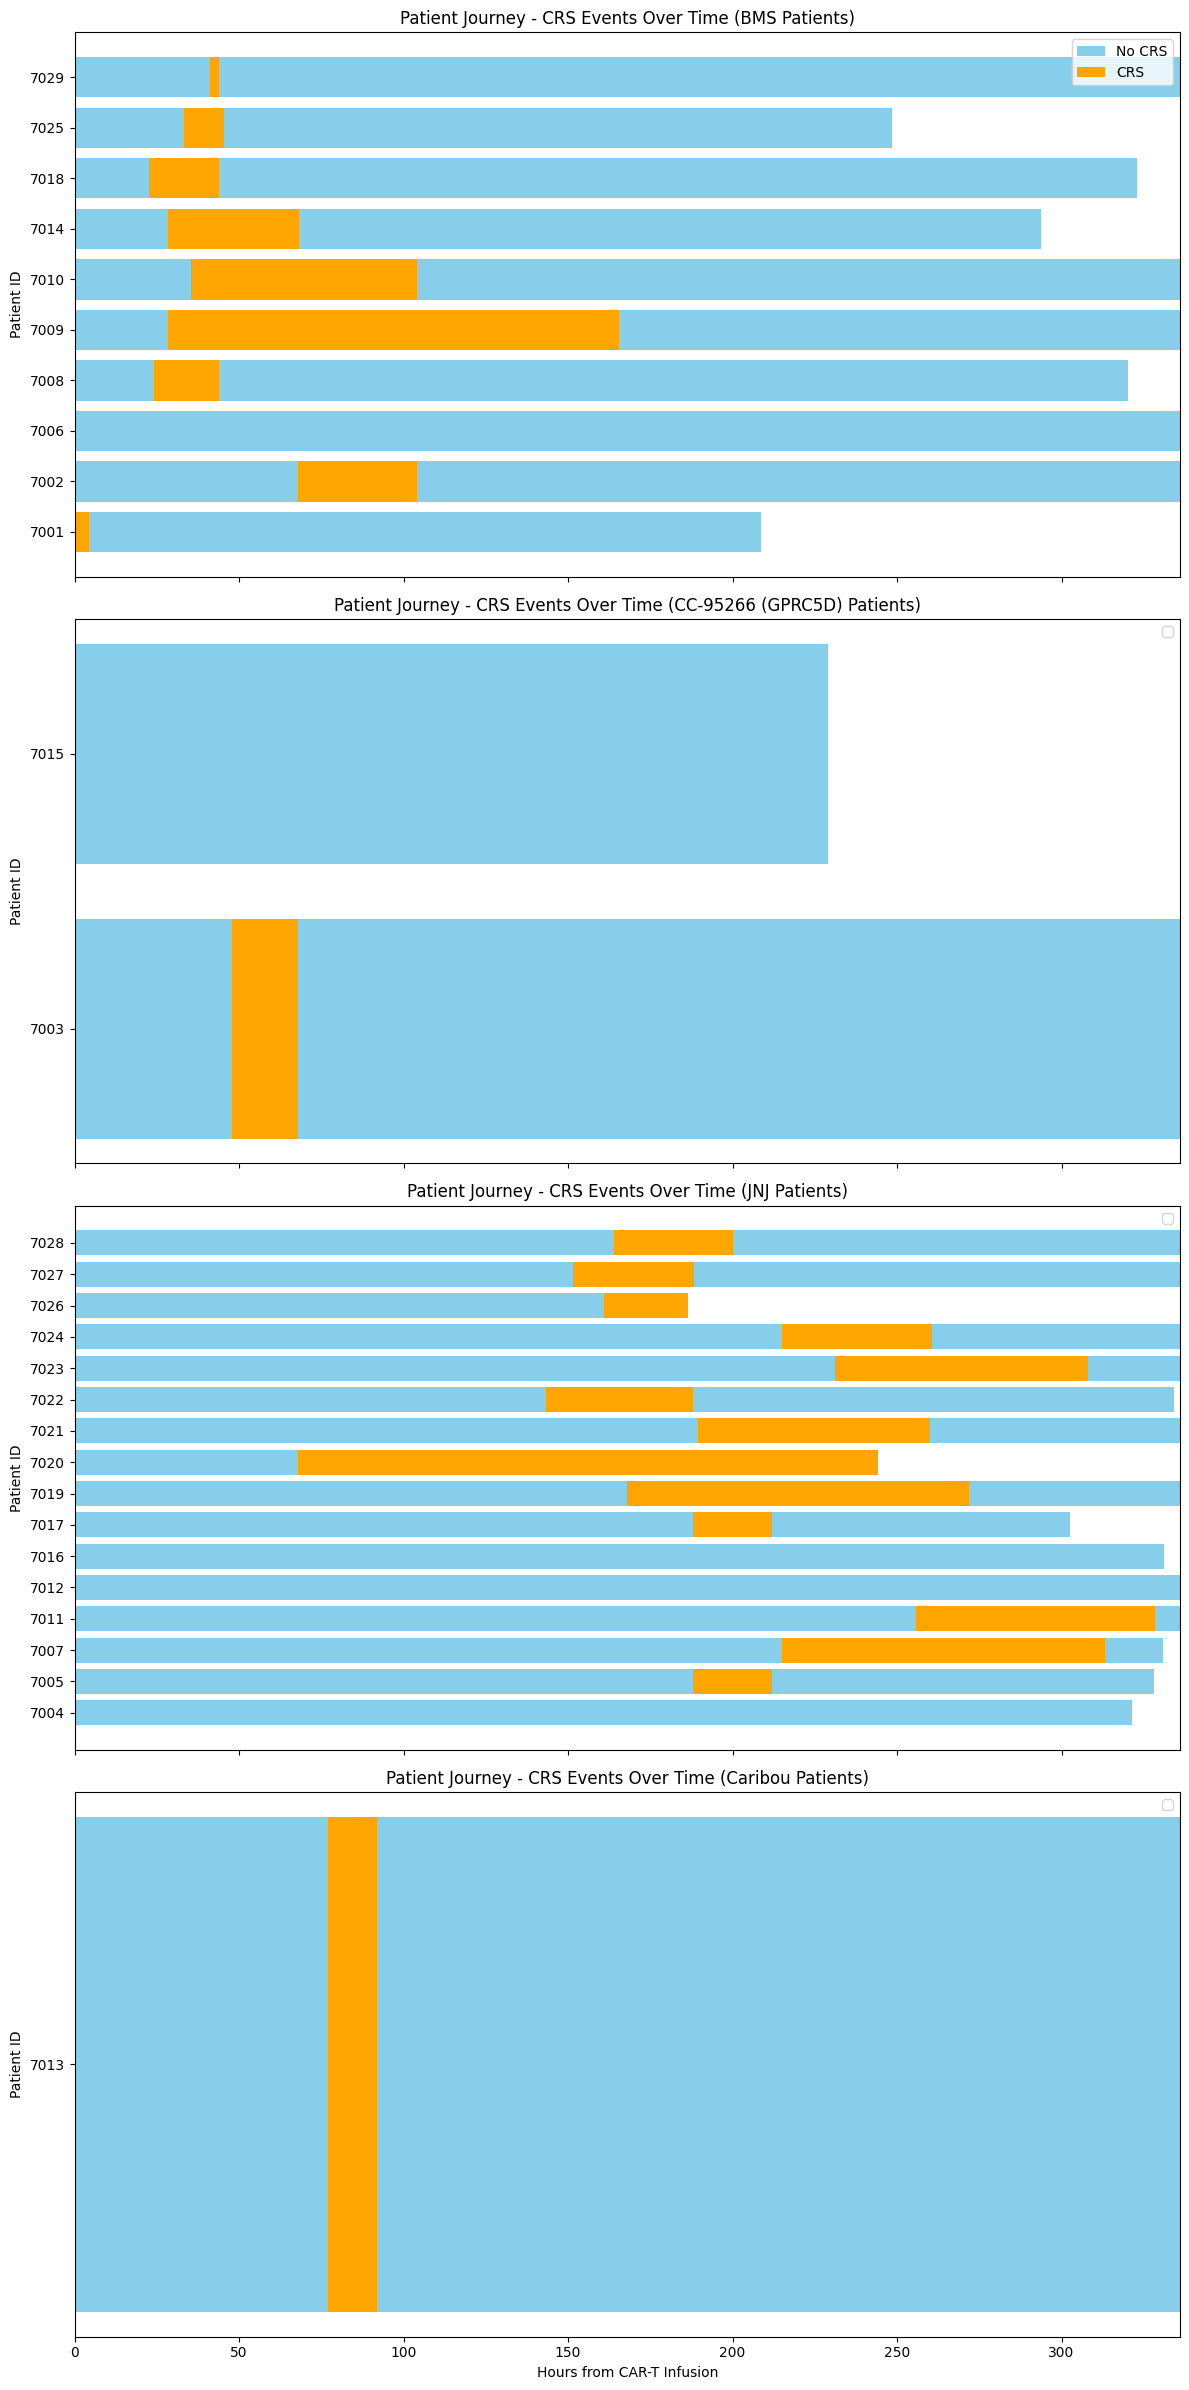

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime columns are in datetime format
final_data['datetime'] = pd.to_datetime(final_data['datetime'], format='%Y-%m-%d %H:%M:%S')
final_data['Date of CAR-T infusion'] = pd.to_datetime(final_data['Date of CAR-T infusion'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Define function to find CRS Start and End dates
def find_crs_dates(group):
    crs_start = group.loc[(group['CRS on date (0 No, 1 Yes)'] == 1), 'datetime'].min()
    crs_end = group.loc[(group['datetime'] > crs_start) & (group['CRS on date (0 No, 1 Yes)'] == 0), 'datetime'].min() if pd.notna(crs_start) else pd.NaT
    return pd.Series({'CRS start date': crs_start, 'CRS end date': crs_end})

# Calculate required time points
time_points = final_data.groupby('patient_id').agg({
    'datetime': 'max',  # Latest datetime
    'Date of CAR-T infusion': 'first',  # CAR-T infusion date
    'Agent (JNJ/BMS/Caribou)': 'first'  # Agent type
}).reset_index()
time_points.columns = ['patient_id', 'Latest datetime', 'CAR-T infusion date', 'Agent']

# Add CRS start and end dates
crs_dates = final_data.groupby('patient_id').apply(find_crs_dates).reset_index()
time_points = pd.merge(time_points, crs_dates, on='patient_id', how='left')

# Categorize each patient based on the "Agent" column
def categorize_agent(agent):
    if 'BMS' in agent:
        return 'BMS'
    elif 'JNJ' in agent:
        return 'JNJ'
    elif 'Caribou' in agent:
        return 'Caribou'
    return agent

time_points['Agent Category'] = time_points['Agent'].apply(categorize_agent)

# Group data by agent category
agent_categories = time_points['Agent Category'].unique()

# Plot
fig, axes = plt.subplots(len(agent_categories), 1, figsize=(12, 6 * len(agent_categories)), sharex=True)

if len(agent_categories) == 1:
    axes = [axes]  # Ensures axes is a list even if there's only one subplot

for i, agent_category in enumerate(agent_categories):
    category_data = time_points[time_points['Agent Category'] == agent_category]
    
    for idx, row in category_data.iterrows():
        patient_id = row['patient_id']
        infusion_date = row['CAR-T infusion date']
        end = row['Latest datetime']
        crs_start = row['CRS start date']
        crs_end = row['CRS end date']
        
        # Only proceed if CAR-T infusion date is available
        if pd.notna(infusion_date):
            # Calculate hours from CAR-T infusion date for each segment
            start_to_crs_start = (crs_start - infusion_date).total_seconds() / 3600 if pd.notna(crs_start) else (end - infusion_date).total_seconds() / 3600
            crs_start_to_crs_end = (crs_end - crs_start).total_seconds() / 3600 if pd.notna(crs_start) and pd.notna(crs_end) else (end - crs_start).total_seconds() / 3600 if pd.notna(crs_start) else 0
            crs_end_to_end = (end - crs_end).total_seconds() / 3600 if pd.notna(crs_end) else 0

            # Plot pre-CRS time in blue (from CAR-T infusion to CRS start)
            if pd.notna(crs_start):
                axes[i].barh(patient_id, start_to_crs_start, left=0, color='skyblue', label='No CRS' if idx == 0 else "")
            else:
                axes[i].barh(patient_id, (end - infusion_date).total_seconds() / 3600, color='skyblue', label='No CRS' if idx == 0 else "")
            
            # Plot CRS time in orange (from CRS start to CRS end)
            if pd.notna(crs_start) and pd.notna(crs_end):
                axes[i].barh(patient_id, crs_start_to_crs_end, left=start_to_crs_start, color='orange', label='CRS' if idx == 0 else "")
            elif pd.notna(crs_start):
                axes[i].barh(patient_id, crs_start_to_crs_end, left=start_to_crs_start, color='orange', label='CRS' if idx == 0 else "")
            
            # Plot post-CRS time in blue (from CRS end to the latest datetime)
            if pd.notna(crs_end):
                axes[i].barh(patient_id, crs_end_to_end, left=start_to_crs_start + crs_start_to_crs_end, color='skyblue')

    # Customize each subplot
    axes[i].set_title(f"Patient Journey - CRS Events Over Time ({agent_category} Patients)")
    axes[i].set_ylabel('Patient ID')
    axes[i].legend(loc='upper right')
    axes[i].set_xlim(0, 336)  # Limit x-axis to 336 hours

# Customize x-axis for the entire figure
axes[-1].set_xlabel('Hours from CAR-T Infusion')
plt.tight_layout()
plt.show()


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/627509774.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crs_dates = final_data.groupby('patient_id').apply(find_crs_dates).reset_index()
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/627509774.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper right')
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_3092/627509774.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored w

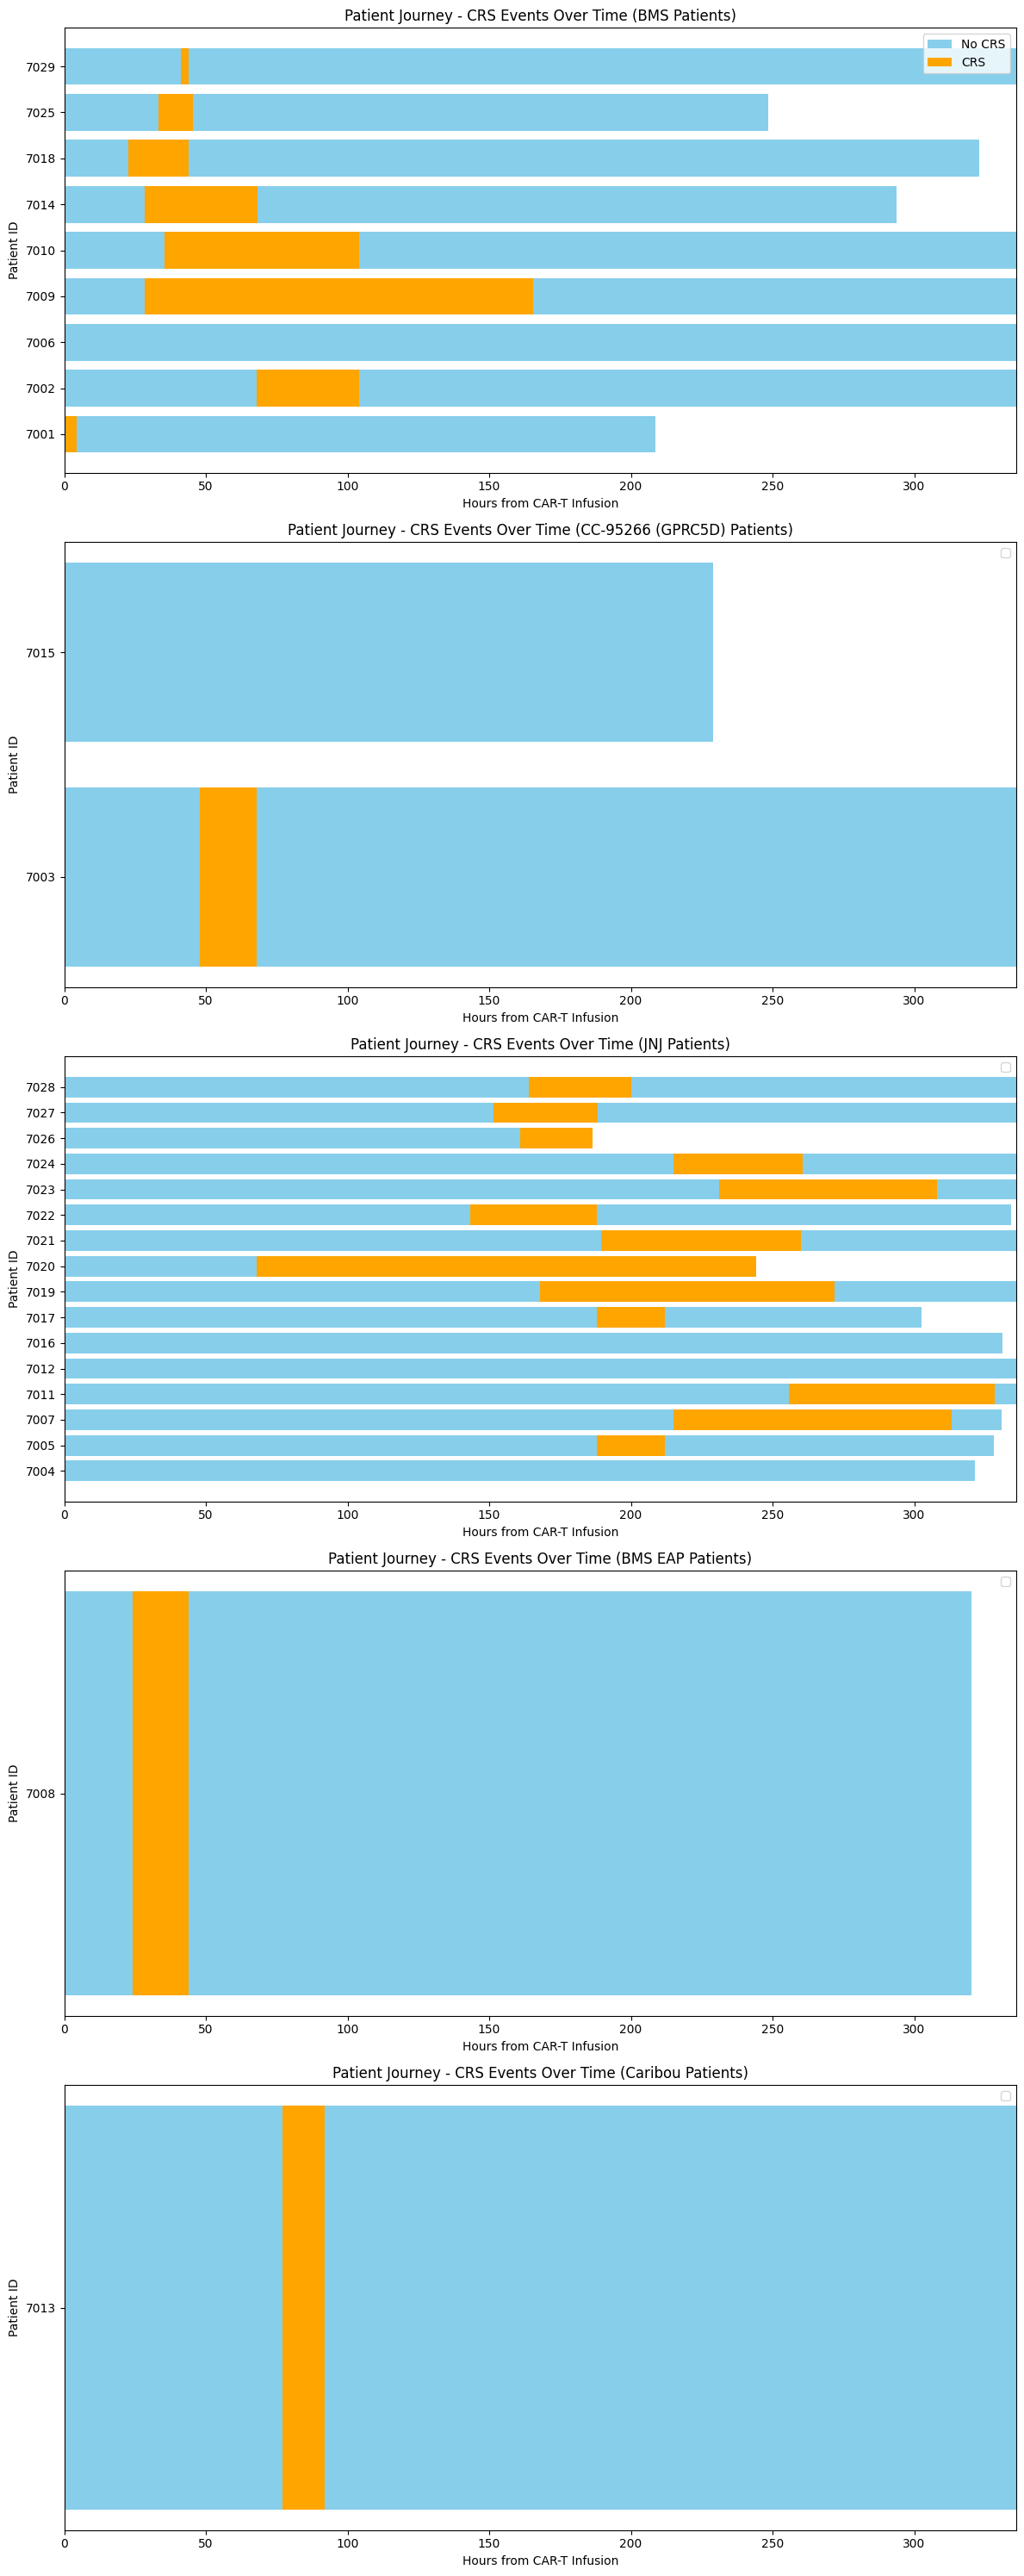

In [177]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime columns are in datetime format
final_data['datetime'] = pd.to_datetime(final_data['datetime'], format='%Y-%m-%d %H:%M:%S')
final_data['Date of CAR-T infusion'] = pd.to_datetime(final_data['Date of CAR-T infusion'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Define function to find CRS Start and End dates
def find_crs_dates(group):
    crs_start = group.loc[(group['CRS on date (0 No, 1 Yes)'] == 1), 'datetime'].min()
    crs_end = group.loc[(group['datetime'] > crs_start) & (group['CRS on date (0 No, 1 Yes)'] == 0), 'datetime'].min() if pd.notna(crs_start) else pd.NaT
    return pd.Series({'CRS start date': crs_start, 'CRS end date': crs_end})

# Calculate required time points
time_points = final_data.groupby('patient_id').agg({
    'datetime': 'max',  # Latest datetime
    'Date of CAR-T infusion': 'first',  # CAR-T infusion date
    'Agent (JNJ/BMS/Caribou)': 'first'  # Agent type
}).reset_index()
time_points.columns = ['patient_id', 'Latest datetime', 'CAR-T infusion date', 'Agent']

# Add CRS start and end dates
crs_dates = final_data.groupby('patient_id').apply(find_crs_dates).reset_index()
time_points = pd.merge(time_points, crs_dates, on='patient_id', how='left')

# Categorize each patient based on the "Agent" column
def categorize_agent(agent):
    if 'BMS' in agent:
        return agent
    elif 'JNJ' in agent:
        return 'JNJ'
    elif 'Caribou' in agent:
        return 'Caribou'
    return agent

time_points['Agent Category'] = time_points['Agent'].apply(categorize_agent)

# Group data by agent category
agent_categories = time_points['Agent Category'].unique()

# Plot
fig, axes = plt.subplots(len(agent_categories), 1, figsize=(12, 6 * len(agent_categories)))

# Ensure axes is a list even if there's only one subplot
if len(agent_categories) == 1:
    axes = [axes]

for i, agent_category in enumerate(agent_categories):
    category_data = time_points[time_points['Agent Category'] == agent_category]
    
    for idx, row in category_data.iterrows():
        patient_id = row['patient_id']
        infusion_date = row['CAR-T infusion date']
        end = row['Latest datetime']
        crs_start = row['CRS start date']
        crs_end = row['CRS end date']
        
        # Only proceed if CAR-T infusion date is available
        if pd.notna(infusion_date):
            # Calculate hours from CAR-T infusion date for each segment
            start_to_crs_start = (crs_start - infusion_date).total_seconds() / 3600 if pd.notna(crs_start) else (end - infusion_date).total_seconds() / 3600
            crs_start_to_crs_end = (crs_end - crs_start).total_seconds() / 3600 if pd.notna(crs_start) and pd.notna(crs_end) else (end - crs_start).total_seconds() / 3600 if pd.notna(crs_start) else 0
            crs_end_to_end = (end - crs_end).total_seconds() / 3600 if pd.notna(crs_end) else 0

            # Plot pre-CRS time in blue (from CAR-T infusion to CRS start)
            if pd.notna(crs_start):
                axes[i].barh(patient_id, start_to_crs_start, left=0, color='skyblue', label='No CRS' if idx == 0 else "")
            else:
                axes[i].barh(patient_id, (end - infusion_date).total_seconds() / 3600, color='skyblue', label='No CRS' if idx == 0 else "")
            
            # Plot CRS time in orange (from CRS start to CRS end)
            if pd.notna(crs_start) and pd.notna(crs_end):
                axes[i].barh(patient_id, crs_start_to_crs_end, left=start_to_crs_start, color='orange', label='CRS' if idx == 0 else "")
            elif pd.notna(crs_start):
                axes[i].barh(patient_id, crs_start_to_crs_end, left=start_to_crs_start, color='orange', label='CRS' if idx == 0 else "")
            
            # Plot post-CRS time in blue (from CRS end to the latest datetime)
            if pd.notna(crs_end):
                axes[i].barh(patient_id, crs_end_to_end, left=start_to_crs_start + crs_start_to_crs_end, color='skyblue')

    # Customize each subplot
    axes[i].set_title(f"Patient Journey - CRS Events Over Time ({agent_category} Patients)")
    axes[i].set_ylabel('Patient ID')
    axes[i].legend(loc='upper right')
    axes[i].set_xlabel('Hours from CAR-T Infusion')
    axes[i].set_xlim(0, 336)  # Limit x-axis to 336 hours

plt.tight_layout()
plt.show()


In [178]:
final_data[final_data.patient_id == "7026"]["CRS on date (0 No, 1 Yes)"].unique()

array([0, 1])

In [179]:
final_data[(final_data.patient_id == "7005")&(final_data['CRS on date (0 No, 1 Yes)']==1)][["CRS on date (0 No, 1 Yes)",'datetime']]

,"CRS on date (0 No, 1 Yes)",datetime
64033,1,2022-12-14 20:01:00
64034,1,2022-12-14 20:02:00
64035,1,2022-12-14 20:03:00
64036,1,2022-12-14 20:04:00
64037,1,2022-12-14 20:05:00
...,...,...
65017,1,2022-12-15 19:56:00
65018,1,2022-12-15 19:57:00
65019,1,2022-12-15 19:58:00
65020,1,2022-12-15 19:59:00


In [180]:
Nurse_data[Nurse_data.Olink_ID=='7026']

,patient id,training_data,Enrolled,CAR-T infusion date Morning time,CAR-T infusion date,CAR-T product,First CRS timestamp (by RN),CRS marker at 1st timesamp,Subsequent CRS timestamps (by RN) and markrs,CRS Grade (max),...,ICANS Grade,Standardized CAR-T product,Standardized First CRS timestamp (by RN) and subsequent,Temperature,SpO2,BP,HR,Standardized First CRS timestamp (by RN) and subsequent (UTC),CH_ID,Olink_ID
98,b3b0edc5-4f4a-42d8-8946-85c889a5eeba,1,9/8/23,2023-09-08 10:19:00,9/8/23,Carvykti,9/14/23 at 17:04,"T 100.9F, HR 116 and SpO2 WNL","9/15/23 11:50 - 101.7F, 9/15/23 18:35 - 102.5F",1,...,0,Carvykti,9/14/23 17:04,100.9F,WNL,WNL,116,2023-09-14 17:04:00+00:00,b3b0edc5-4f4a-42d8-8946-85c889a5eeba,7026
99,b3b0edc5-4f4a-42d8-8946-85c889a5eeba,1,9/8/23,2023-09-08 10:19:00,NaN,Carvykti,9/14/23 at 17:04,"T 100.9F, HR 116 and SpO2 WNL","9/15/23 11:50 - 101.7F, 9/15/23 18:35 - 102.5F",1,...,0,Carvykti,9/15/23 11:50,101.7F,WNL,WNL,WNL,2023-09-15 11:50:00+00:00,b3b0edc5-4f4a-42d8-8946-85c889a5eeba,7026
100,b3b0edc5-4f4a-42d8-8946-85c889a5eeba,1,9/8/23,2023-09-08 10:19:00,NaN,Carvykti,9/14/23 at 17:04,"T 100.9F, HR 116 and SpO2 WNL","9/15/23 11:50 - 101.7F, 9/15/23 18:35 - 102.5F",1,...,0,Carvykti,9/15/23 18:35,102.5F,WNL,WNL,WNL,2023-09-15 18:35:00+00:00,b3b0edc5-4f4a-42d8-8946-85c889a5eeba,7026


In [181]:
Nurse_data_selected[Nurse_data_selected.Olink_ID=='7026']

,Olink_ID,CRS intervention,Standardized First CRS timestamp (by RN) and subsequent (UTC),CRS Grade (max),Temperature,SpO2,BP,HR
98,7026,Toci on 9/14/23,2023-09-14 17:04:00+00:00,1,100.9F,WNL,WNL,116
99,7026,Toci on 9/14/23,2023-09-15 11:50:00+00:00,1,101.7F,WNL,WNL,WNL
100,7026,Toci on 9/14/23,2023-09-15 18:35:00+00:00,1,102.5F,WNL,WNL,WNL


In [182]:
wearable_data.head(2)

,patient_id,pr_display,spo2_display,resp_display,pulse_rate_obscount,pulse_rate_avg,pulse_rate_min,pulse_rate_max,pulse_rate_iqr,spo2_obscount,...,weight_avg,weight_min,weight_max,motion_obscount,motion_avg,step_count_sum,step_count_obscount,date,time,datetime
0,WEAR_7025,NaN,NaN,NaN,2.0,180.52,177.05,184.00,6.95,NaN,...,NaN,NaN,NaN,3.0,1.00,0.0,2.0,8/8/2023,17:26:00,2023-08-08 17:26:00
1,WEAR_7025,NaN,NaN,NaN,2.0,200.71,196.79,204.63,7.84,NaN,...,NaN,NaN,NaN,8.0,6.13,0.0,2.0,8/8/2023,17:27:00,2023-08-08 17:27:00


In [183]:
wearable_data.columns

Index(['patient_id', 'pr_display', 'spo2_display', 'resp_display',
       'pulse_rate_obscount', 'pulse_rate_avg', 'pulse_rate_min',
       'pulse_rate_max', 'pulse_rate_iqr', 'spo2_obscount', 'spo2_avg',
       'spo2_min', 'spo2_max', 'respiratory_rate_obscount',
       'respiratory_rate_avg', 'respiratory_rate_min', 'respiratory_rate_max',
       'covered_skin_temperature_obscount', 'covered_skin_temperature_avg',
       'covered_skin_temperature_min', 'covered_skin_temperature_max',
       'covered_axil_temperature_obscount', 'covered_axil_temperature_avg',
       'covered_axil_temperature_min', 'covered_axil_temperature_max',
       'systolic_bp_obscount', 'systolic_bp_avg', 'systolic_bp_min',
       'systolic_bp_max', 'diastolic_bp_obscount', 'diastolic_bp_avg',
       'diastolic_bp_min', 'diastolic_bp_max', 'weight_obscount', 'weight_avg',
       'weight_min', 'weight_max', 'motion_obscount', 'motion_avg',
       'step_count_sum', 'step_count_obscount', 'date', 'time', 'datetime'

In [184]:
## Set the threshold for nurse data
nurse_thres_columns = ['pulse_rate_avg','pulse_rate_max', 'pulse_rate_min', 'spo2_avg','spo2_min', 'spo2_max', 'respiratory_rate_avg', 'respiratory_rate_min', 'respiratory_rate_max',
                       'covered_skin_temperature_avg','covered_skin_temperature_min', 'covered_skin_temperature_max','covered_axil_temperature_avg', 'covered_axil_temperature_min',
                       'covered_axil_temperature_max']

In [185]:
ranges = {}
for col in nurse_thres_columns:
    if col in final_data.columns:
        min_val = final_data[col].min()
        max_val = final_data[col].max()
        ranges[col] = (min_val, max_val)
    else:
        print(f"Column '{col}' not found in DataFrame.")


# Display the ranges
for col, (min_val, max_val) in ranges.items():
    print(f"Column '{col}': Min = {min_val}, Max = {max_val}")

Column 'pulse_rate_avg': Min = 30.0, Max = 238.95
Column 'pulse_rate_max': Min = 30.0, Max = 240.0
Column 'pulse_rate_min': Min = 30.0, Max = 238.95
Column 'spo2_avg': Min = 71.0, Max = 100.0
Column 'spo2_min': Min = 71.0, Max = 100.0
Column 'spo2_max': Min = 71.0, Max = 100.0
Column 'respiratory_rate_avg': Min = 6.0, Max = 60.0
Column 'respiratory_rate_min': Min = 6.0, Max = 60.0
Column 'respiratory_rate_max': Min = 6.0, Max = 60.0
Column 'covered_skin_temperature_avg': Min = -7.81, Max = 39.54
Column 'covered_skin_temperature_min': Min = -7.81, Max = 39.54
Column 'covered_skin_temperature_max': Min = -7.81, Max = 39.54
Column 'covered_axil_temperature_avg': Min = 0.0, Max = 41.28
Column 'covered_axil_temperature_min': Min = 0.0, Max = 41.28
Column 'covered_axil_temperature_max': Min = 0.0, Max = 41.28


In [186]:
# Define thresholds for pulse rate and respiratory rate
thresholds = {
    'pulse_rate_avg': (40, 150),
    'pulse_rate_min': (40, 150),
    'pulse_rate_max': (40, 150),
    'covered_skin_temperature_avg': (24, 43),
    'covered_skin_temperature_min': (24, 43),
    'covered_skin_temperature_max': (24, 43),
    'covered_axil_temperature_avg': (24, 43),
    'covered_axil_temperature_min': (24, 43),
    'covered_axil_temperature_max': (24, 43),
}

# Clip the data for each column within the specified thresholds
final_data_clipped = final_data.copy()
for column, (min_val, max_val) in thresholds.items():
    if column in final_data_clipped.columns:
        final_data_clipped[column] = final_data_clipped[column].clip(lower=min_val, upper=max_val)

In [187]:
ranges = {}
for col in nurse_thres_columns:
    if col in final_data_clipped.columns:
        min_val = final_data_clipped[col].min()
        max_val = final_data_clipped[col].max()
        ranges[col] = (min_val, max_val)
    else:
        print(f"Column '{col}' not found in DataFrame.")


# Display the ranges
for col, (min_val, max_val) in ranges.items():
    print(f"Column '{col}': Min = {min_val}, Max = {max_val}")

Column 'pulse_rate_avg': Min = 40.0, Max = 150.0
Column 'pulse_rate_max': Min = 40.0, Max = 150.0
Column 'pulse_rate_min': Min = 40.0, Max = 150.0
Column 'spo2_avg': Min = 71.0, Max = 100.0
Column 'spo2_min': Min = 71.0, Max = 100.0
Column 'spo2_max': Min = 71.0, Max = 100.0
Column 'respiratory_rate_avg': Min = 6.0, Max = 60.0
Column 'respiratory_rate_min': Min = 6.0, Max = 60.0
Column 'respiratory_rate_max': Min = 6.0, Max = 60.0
Column 'covered_skin_temperature_avg': Min = 24.0, Max = 39.54
Column 'covered_skin_temperature_min': Min = 24.0, Max = 39.54
Column 'covered_skin_temperature_max': Min = 24.0, Max = 39.54
Column 'covered_axil_temperature_avg': Min = 24.0, Max = 41.28
Column 'covered_axil_temperature_min': Min = 24.0, Max = 41.28
Column 'covered_axil_temperature_max': Min = 24.0, Max = 41.28


In [188]:
reference_dataset = df_cytokine[['PT_ID','Agent (JNJ/BMS/Caribou)']].drop_duplicates()
reference_dataset.rename(columns={"PT_ID":"patient_id","Agent (JNJ/BMS/Caribou)":"Reference_Agent"}, inplace=True)
reference_dataset['patient_id'] = reference_dataset['patient_id'].astype(int).astype(str)
reference_dataset.dtypes
reference_dataset

,patient_id,Reference_Agent
0,7001,BMS
60,7002,BMS
77,7003,CC-95266 (GPRC5D)
119,7004,JNJ
172,7005,JNJ OOS
12,7006,BMS
96,7007,JNJ
135,7008,BMS EAP
26,7009,BMS
186,7010,BMS


In [189]:
reference_dataset.groupby(by=['Reference_Agent']).count()

,patient_id
Reference_Agent,
BMS,9
BMS EAP,1
CB-011 (Caribou),1
CC-95266 (GPRC5D),2
JNJ,16
JNJ OOS,1


In [190]:
merged_data = final_data_clipped.merge(
    reference_dataset[['patient_id', 'Reference_Agent']],
    on='patient_id',
    how='left'  # Use 'left' join to keep all rows in the final dataset
)
merged_data['Agent (JNJ/BMS/Caribou)'] = merged_data['Reference_Agent']
# Drop the extra column from the reference dataset
merged_data.drop(columns=['Reference_Agent'], inplace=True)
final_data_clipped = merged_data

In [191]:
merged_data[['patient_id', 'Agent (JNJ/BMS/Caribou)']]

,patient_id,Agent (JNJ/BMS/Caribou)
0,7001,BMS
1,7001,BMS
2,7001,BMS
3,7001,BMS
4,7001,BMS
...,...,...
331296,7029,BMS
331297,7029,BMS
331298,7029,BMS
331299,7029,BMS


In [192]:
final_data_clipped.to_csv("../../Datasets/final_data_clipped.csv")